In [115]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd

In [116]:
# ---------------------------
# 1. Load and Inspect the Data
# ---------------------------

# Load the dataset (update the file path if needed)
df = pd.read_csv('hdx_hapi_food_price_assaba.csv')

In [117]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head(), "\n")

First few rows of the dataset:


location_code  has_hrp  in_gho provider_admin1_name provider_admin2_name  \
0           MRT    False   False               Assaba             Kankossa   
1           MRT    False   False               Assaba             Kankossa   
2           MRT    False   False               Assaba             Kankossa   
3           MRT    False   False               Assaba             Kankossa   
4           MRT    False   False               Assaba             Kankossa   

  admin1_code admin1_name admin2_code admin2_name  admin_level  ...  \
0        MR03      Assaba       MR034   Kankoussa            2  ...   
1        MR03      Assaba       MR034   Kankoussa            2  ...   
2        MR03      Assaba       MR034   Kankoussa            2  ...   
3        MR03      Assaba       MR034   Kankoussa            2  ...   
4        MR03      Assaba       MR034   Kankoussa            2  ...   

         lon  commodity_category      commodity_name unit price_flag  \
0 -11.527006  cereals and tubers     Rice (imported)   KG     actual   
1 -11.527006  cereals and tubers        Rice (local)   KG     actual   
2 -11.527006  cereals and tubers  Sorghum (taghalit)   KG     actual   
3 -11.527006  cereals and tubers               Wheat   KG     actual   
4 -11.527006  miscellaneous food               Sugar   KG     actual   

  price_type currency_code price reference_period_start  reference_period_end  
0     Retail           MRU  22.0             2012-01-15            2012-02-14  
1     Retail           MRU  18.0             2012-01-15            2012-02-14  
2     Retail           MRU  28.3             2012-01-15            2012-02-14  
3     Retail           MRU  14.0             2012-01-15            2012-02-14  
4     Retail           MRU  55.0             2012-01-15            2012-02-14  

[5 rows x 22 columns]

'\n'

In [118]:
# Print the list of columns in the dataset
print("Columns in the dataset:")
display(df.columns.tolist())

Columns in the dataset:


['location_code',
 'has_hrp',
 'in_gho',
 'provider_admin1_name',
 'provider_admin2_name',
 'admin1_code',
 'admin1_name',
 'admin2_code',
 'admin2_name',
 'admin_level',
 'market_name',
 'lat',
 'lon',
 'commodity_category',
 'commodity_name',
 'unit',
 'price_flag',
 'price_type',
 'currency_code',
 'price',
 'reference_period_start',
 'reference_period_end']

In [119]:
# Display basic information about the dataset
print("Dataset info:")
display(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_code           2187 non-null   object 
 1   has_hrp                 2187 non-null   bool   
 2   in_gho                  2187 non-null   bool   
 3   provider_admin1_name    2187 non-null   object 
 4   provider_admin2_name    2187 non-null   object 
 5   admin1_code             2187 non-null   object 
 6   admin1_name             2187 non-null   object 
 7   admin2_code             2187 non-null   object 
 8   admin2_name             2187 non-null   object 
 9   admin_level             2187 non-null   int64  
 10  market_name             2187 non-null   object 
 11  lat                     2187 non-null   float64
 12  lon                     2187 non-null   float64
 13  commodity_category      2187 non-null   object 
 14  commodity_name          21

None

In [120]:
# Identify columns with only one unique value
unique_counts = df.nunique()
columns_to_drop = unique_counts[unique_counts == 1].index.tolist()

columns_to_drop.remove("currency_code")

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

print("Dropped columns:", columns_to_drop)

Dropped columns: ['location_code', 'has_hrp', 'in_gho', 'provider_admin1_name', 'admin1_code', 'admin1_name', 'admin_level', 'price_type']


In [122]:
df = df[df['price'] >= 0]


In [123]:
# Display basic information about the dataset
print("Dataset info:")
display(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   provider_admin2_name    2187 non-null   object 
 1   admin2_code             2187 non-null   object 
 2   admin2_name             2187 non-null   object 
 3   market_name             2187 non-null   object 
 4   lat                     2187 non-null   float64
 5   lon                     2187 non-null   float64
 6   commodity_category      2187 non-null   object 
 7   commodity_name          2187 non-null   object 
 8   unit                    2187 non-null   object 
 9   price_flag              2187 non-null   object 
 10  currency_code           2187 non-null   object 
 11  price                   2187 non-null   float64
 12  reference_period_start  2187 non-null   object 
 13  reference_period_end    2187 non-null   object 
dtypes: float64(3), object(11)


None

In [124]:
df['price_flag'].unique()

array(['actual', 'actual,aggregate', 'aggregate'], dtype=object)

In [125]:
df['market_name'].unique()

array(['Kankossa', 'Barkéol', 'Kiffa'], dtype=object)

In [126]:
df['unit'].unique()

array(['KG', 'L', 'Head', '50 KG', 'Unit', 'Heap'], dtype=object)

In [127]:
df['price_flag'].unique()

array(['actual', 'actual,aggregate', 'aggregate'], dtype=object)

In [128]:
# Show descriptive statistics for numeric columns
print("Descriptive statistics:")
display(df.describe(include='all'))

Descriptive statistics:


provider_admin2_name admin2_code admin2_name market_name          lat  \
count                  2187        2187        2187        2187  2187.000000   
unique                    3           3           3           3          NaN   
top                 Barkeol       MR031     Barkeol     Barkéol          NaN   
freq                   1646        1646        1646        1646          NaN   
mean                    NaN         NaN         NaN         NaN    16.513376   
std                     NaN         NaN         NaN         NaN     0.268166   
min                     NaN         NaN         NaN         NaN    15.938907   
25%                     NaN         NaN         NaN         NaN    16.640389   
50%                     NaN         NaN         NaN         NaN    16.640389   
75%                     NaN         NaN         NaN         NaN    16.640389   
max                     NaN         NaN         NaN         NaN    16.640389   

                lon  commodity_category      commodity_name  unit price_flag  \
count   2187.000000                2187                2187  2187       2187   
unique          NaN                   7                  40     6          3   
top             NaN  cereals and tubers  Sorghum (taghalit)    KG  aggregate   
freq            NaN                1099                 195  1476       1328   
mean     -12.249731                 NaN                 NaN   NaN        NaN   
std        0.434876                 NaN                 NaN   NaN        NaN   
min      -12.498493                 NaN                 NaN   NaN        NaN   
25%      -12.498493                 NaN                 NaN   NaN        NaN   
50%      -12.498493                 NaN                 NaN   NaN        NaN   
75%      -12.498493                 NaN                 NaN   NaN        NaN   
max      -11.403880                 NaN                 NaN   NaN        NaN   

       currency_code         price reference_period_start reference_period_end  
count           2187   2187.000000                   2187                 2187  
unique             1           NaN                    154                  154  
top              MRU           NaN             2025-03-15           2025-04-14  
freq            2187           NaN                     30                   30  
mean             NaN   1075.863973                    NaN                  NaN  
std              NaN   3254.211287                    NaN                  NaN  
min              NaN     10.000000                    NaN                  NaN  
25%              NaN     22.500000                    NaN                  NaN  
50%              NaN     35.670000                    NaN                  NaN  
75%              NaN    198.330000                    NaN                  NaN  
max              NaN  30944.450000                    NaN                  NaN

In [129]:
# Check for missing values in each column
print("Missing values in each column:")
display(df.isnull().sum())

Missing values in each column:


provider_admin2_name      0
admin2_code               0
admin2_name               0
market_name               0
lat                       0
lon                       0
commodity_category        0
commodity_name            0
unit                      0
price_flag                0
currency_code             0
price                     0
reference_period_start    0
reference_period_end      0
dtype: int64

In [130]:
# Define a function to map each commodity to an aggregated category.
def aggregate_commodity(name):
    lower_name = name.lower()
    if 'milk' in lower_name:
        return 'Milk'
    elif 'meat' in lower_name:
        return 'Meat'
    elif 'livestock' in lower_name:
        return 'Livestock'
    elif 'fish' in lower_name:
        return 'Fish'
    elif 'wheat' in lower_name:
        return 'Wheat'
    elif 'sorghum' in lower_name:
        return 'Sorghum'
    elif 'sugar' in lower_name:
        return 'Sugar'
    elif 'oil' in lower_name:
        return 'Oil'
    elif 'beans' in lower_name:
        return 'Beans'
    elif 'maize' in lower_name:
        return 'Maize'
    elif 'pasta' in lower_name:
        return 'Pasta'
    elif 'feed' in lower_name:
        return 'Feed'
    elif 'millet' in lower_name:
        return 'Millet'
    elif 'groundnut' in lower_name:
        return 'Groundnuts'
    elif 'straw' in lower_name:
        return 'Straw'
    elif 'salt' in lower_name:
        return 'Salt'
    elif 'rice' in lower_name:
        return 'Rice'
    else:
        return name  # If no keyword matches, keep original

# Create a new column for the aggregated commodity category.
#df['aggregated_commodity_name'] = df['commodity_name'].apply(aggregate_commodity)
df['aggregated_commodity_name'] = df['commodity_name']

In [131]:
df['aggregated_commodity_name'].value_counts()

aggregated_commodity_name
Sorghum (taghalit)                                195
Sugar                                             195
Wheat                                             194
Rice (imported)                                   192
Rice (local)                                      192
Oil (vegetable)                                   191
Milk (powder)                                      81
Beans (niebe)                                      81
Maize                                              80
Pasta (macaroni)                                   75
Wheat flour                                        75
Feed (rakhel)                                      75
Livestock (goat, medium-sized male)                72
Feed (flour)                                       72
Livestock (sheep, medium-sized castrated male)     72
Feed (wheat bran)                                  72
Wheat meal                                         72
Livestock (camel)                                  72
Li

In [132]:
agg_counts = df['aggregated_commodity_name'].value_counts()
valid_groups = agg_counts[agg_counts >= 50].index.tolist()
df = df[df['aggregated_commodity_name'].isin(valid_groups)]
df['aggregated_commodity_name'].value_counts()

aggregated_commodity_name
Sorghum (taghalit)                                195
Sugar                                             195
Wheat                                             194
Rice (imported)                                   192
Rice (local)                                      192
Oil (vegetable)                                   191
Milk (powder)                                      81
Beans (niebe)                                      81
Maize                                              80
Feed (rakhel)                                      75
Pasta (macaroni)                                   75
Wheat flour                                        75
Wheat meal                                         72
Livestock (camel)                                  72
Livestock (goat, medium-sized male)                72
Livestock (sheep, medium-sized castrated male)     72
Feed (flour)                                       72
Feed (wheat bran)                                  72
Li

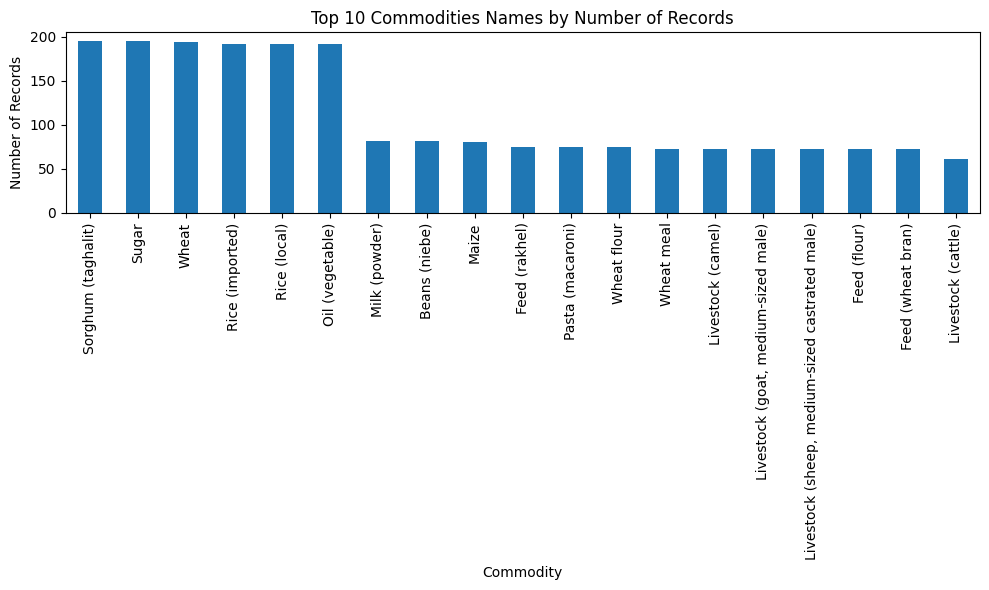

In [133]:
# A. Top 10 Commodities by Number of Records
commodity_name_counts = df['aggregated_commodity_name'].value_counts().head(20)
plt.figure(figsize=(10, 6))
commodity_name_counts.plot(kind='bar')
plt.title("Top 10 Commodities Names by Number of Records")
plt.xlabel("Commodity")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()

In [134]:
df[df['unit']=='KG']['aggregated_commodity_name'].unique()

array(['Rice (imported)', 'Rice (local)', 'Sorghum (taghalit)', 'Wheat',
       'Sugar', 'Maize', 'Milk (powder)', 'Beans (niebe)',
       'Pasta (macaroni)', 'Wheat flour', 'Wheat meal'], dtype=object)

In [135]:
df[df['unit']=='L']['aggregated_commodity_name'].unique()

array(['Oil (vegetable)'], dtype=object)

In [136]:
df[df['unit']=='50 KG']['aggregated_commodity_name'].unique()

array(['Feed (flour)', 'Feed (rakhel)', 'Feed (wheat bran)'], dtype=object)

In [137]:
df[df['unit']=='50 KG']['price']

868     500.00
869     650.00
870     560.00
880     500.00
881     650.00
         ...  
2094    750.00
2095    650.00
2121    901.67
2151    822.22
2181    887.04
Name: price, Length: 219, dtype: float64

In [138]:
df[df['unit']=='KG']['price']

0        22.00
1        18.00
2        28.30
3        14.00
4        55.00
         ...  
2165     15.07
2166     50.00
2176    142.96
2178     33.44
2185     93.33
Name: price, Length: 1432, dtype: float64

In [139]:
# Identify rows with unit '50 KG'
mask = df['unit'] == '50 KG'

# Adjust the price by dividing by 50 and update the unit to 'KG'
df.loc[mask, 'price'] = df.loc[mask, 'price'] / 50
df.loc[mask, 'unit'] = 'KG'

# Verify the update by checking a sample
print(df[mask][['price', 'unit']].head())

     price unit
868   10.0   KG
869   13.0   KG
870   11.2   KG
880   10.0   KG
881   13.0   KG


In [140]:
df[df['unit']=='Head']['aggregated_commodity_name'].unique()

array(['Livestock (camel)', 'Livestock (cattle)',
       'Livestock (goat, medium-sized male)',
       'Livestock (sheep, medium-sized castrated male)'], dtype=object)

In [141]:
admin2_names = df['admin2_name'].unique()  # or use your aggregated column name

In [142]:
# ---------------------------
# 2. (Assumption) The DataFrame has an aggregated commodity field named 'aggregated_commodity_name'
# ---------------------------
# (If not, please create it before this step using your own mapping logic.)

# ---------------------------
# 3. Define the Outlier Removal Function Using IQR
# ---------------------------
def remove_outliers_iqr(group, column='price'):
    # If the group has only one record, return it unchanged.
    if len(group) <= 1:
        return group
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return only rows where the price is within the acceptable range.
    return group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]

# ---------------------------
# 4. Apply the Function to Each Aggregated Commodity Group
# ---------------------------
df_clean = df.groupby('aggregated_commodity_name', group_keys=False).apply(remove_outliers_iqr)

# ---------------------------
# 5. Verify the Cleaned Data
# ---------------------------
print("Cleaned DataFrame (first few rows):")
print(df_clean.head())
print("\nCounts per Aggregated Commodity after outlier removal:")
print(df_clean['aggregated_commodity_name'].value_counts())

Cleaned DataFrame (first few rows):
    provider_admin2_name admin2_code admin2_name market_name        lat  \
688                Kiffa       MR035       Kiffa       Kiffa  16.617069   
698                Kiffa       MR035       Kiffa       Kiffa  16.617069   
708                Kiffa       MR035       Kiffa       Kiffa  16.617069   
718                Kiffa       MR035       Kiffa       Kiffa  16.617069   
728                Kiffa       MR035       Kiffa       Kiffa  16.617069   

          lon commodity_category commodity_name unit price_flag currency_code  \
688 -11.40388    pulses and nuts  Beans (niebe)   KG     actual           MRU   
698 -11.40388    pulses and nuts  Beans (niebe)   KG     actual           MRU   
708 -11.40388    pulses and nuts  Beans (niebe)   KG     actual           MRU   
718 -11.40388    pulses and nuts  Beans (niebe)   KG     actual           MRU   
728 -11.40388    pulses and nuts  Beans (niebe)   KG     actual           MRU   

     price reference_perio

/var/folders/m0/nk1jn59j3fz7gszvmr4m52m00000gn/T/ipykernel_70669/2020838210.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df.groupby('aggregated_commodity_name', group_keys=False).apply(remove_outliers_iqr)


In [143]:
df = df_clean

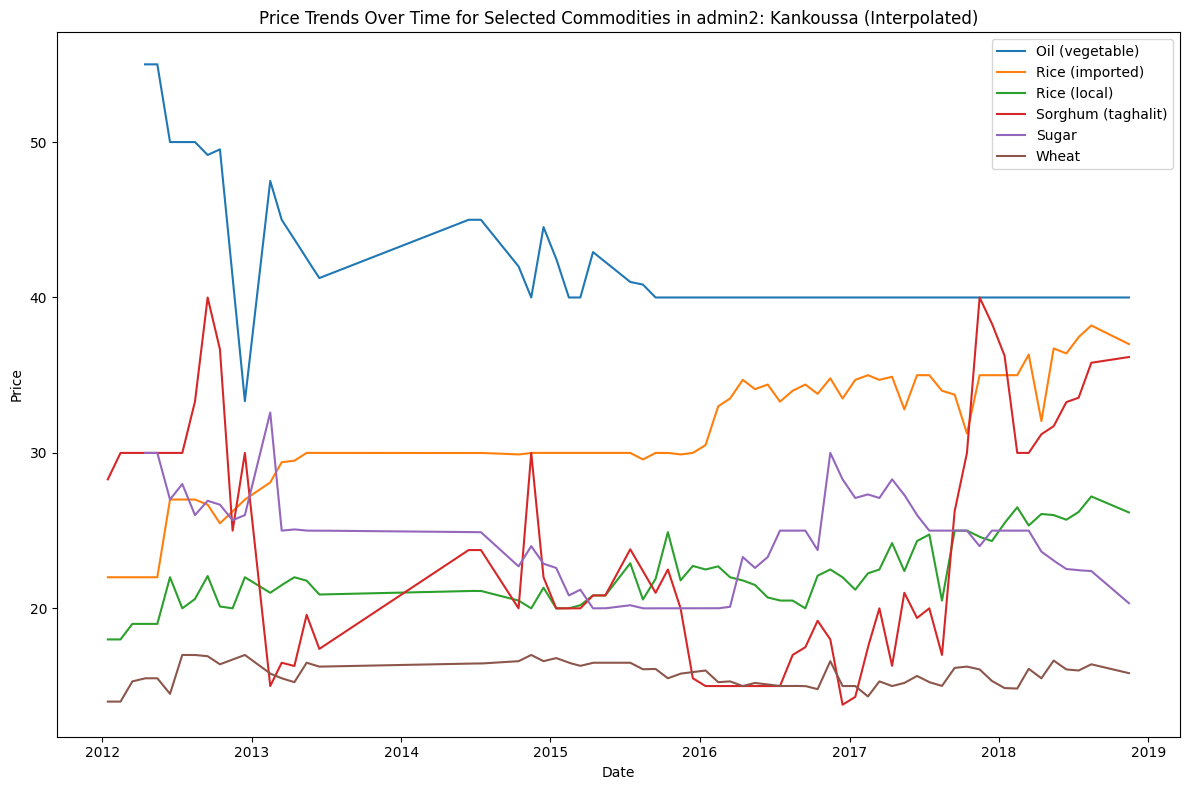

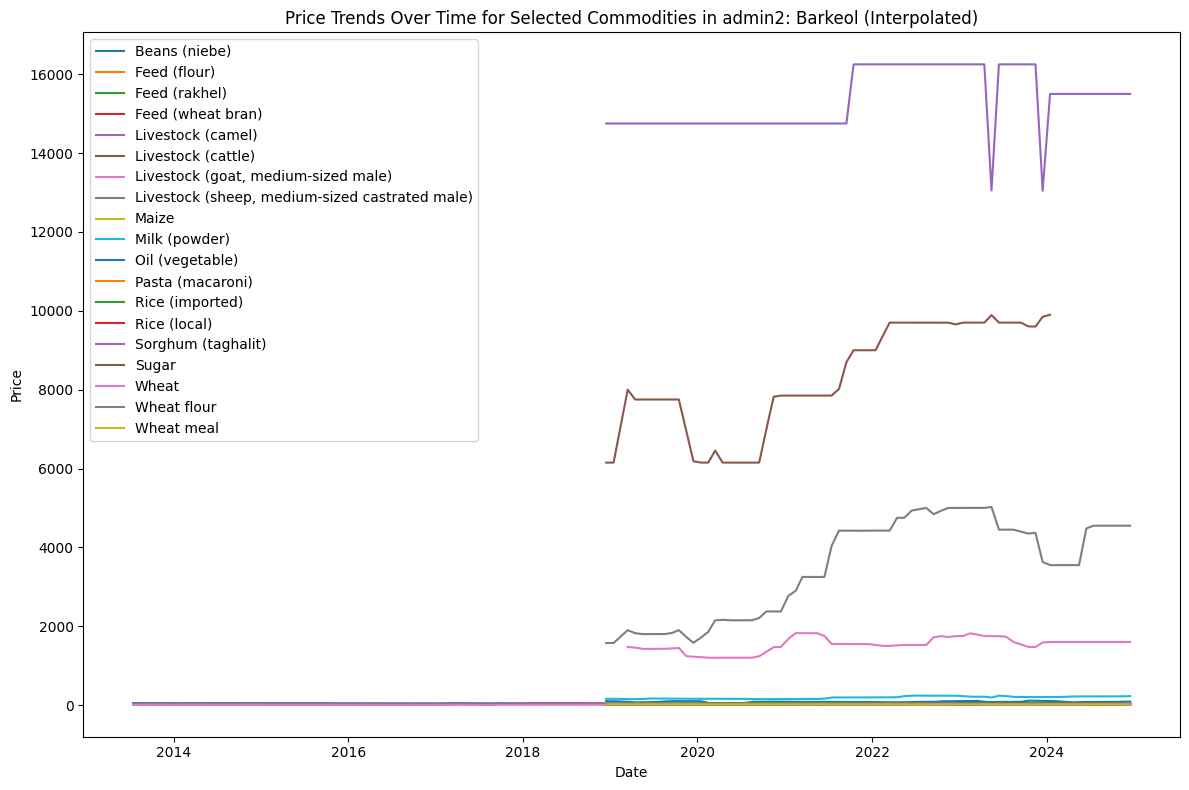

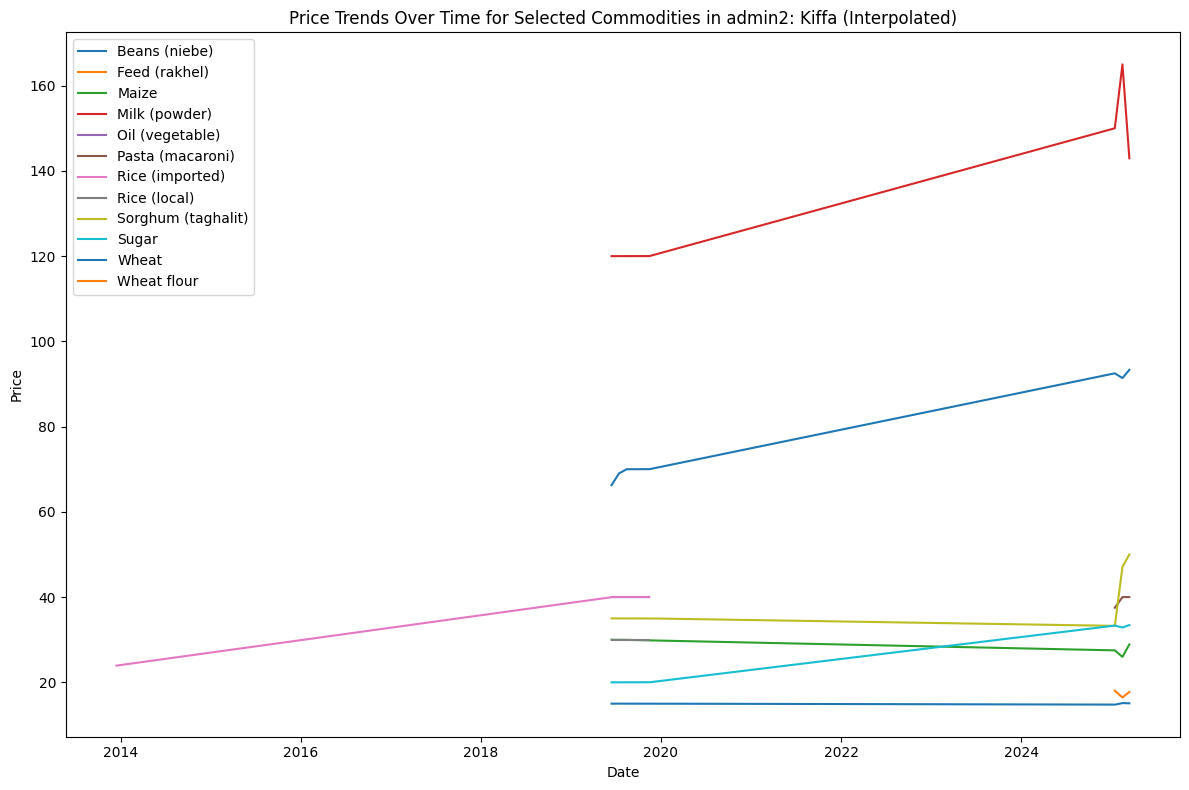

In [144]:
# Convert the reference period start to datetime for time-series analysis
df['date'] = pd.to_datetime(df['reference_period_start'])


for target_admin2 in admin2_names:
    # ---------------------------
    # 3. Plot Time Series for Each Aggregated Commodity (Filtered by admin2_name)
    # ---------------------------
    key_commodities = df['aggregated_commodity_name'].unique()  # or use your aggregated column name
    
    plt.figure(figsize=(12, 8))
    
    for commodity in key_commodities:
        # Skip "Livestock" if needed
        if commodity == "Livestock":
            continue
        # Filter by both aggregated commodity and the target admin2_name
        subset = df[(df['aggregated_commodity_name'] == commodity) & (df['admin2_name'] == target_admin2)].sort_values('date')
        if not subset.empty:
            # Group by date to aggregate prices (e.g., using the mean for days with multiple records)
            subset_grouped = subset.groupby('date')['price'].mean()
            # Create a complete daily date range from the earliest to the latest date in the data
            full_range = pd.date_range(start=subset_grouped.index.min(), end=subset_grouped.index.max(), freq='D')
            # Reindex the grouped data to this full range
            subset_interp = subset_grouped.reindex(full_range)
            # Interpolate missing 'price' values using time-based interpolation
            subset_interp = subset_interp.interpolate(method='time')
            # Plot the interpolated prices for the commodity
            plt.plot(subset_interp.index, subset_interp.values, label=commodity)
    
    plt.title(f"Price Trends Over Time for Selected Commodities in admin2: {target_admin2} (Interpolated)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.tight_layout()
    plt.show()

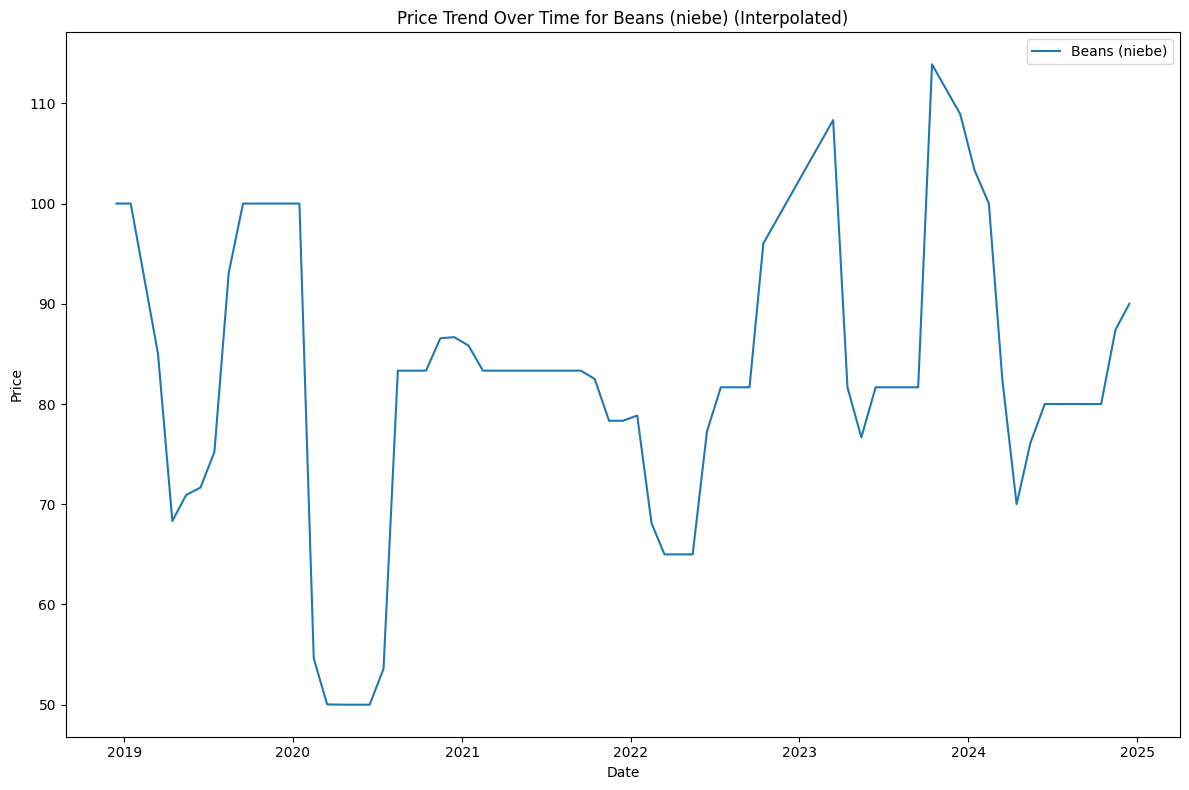

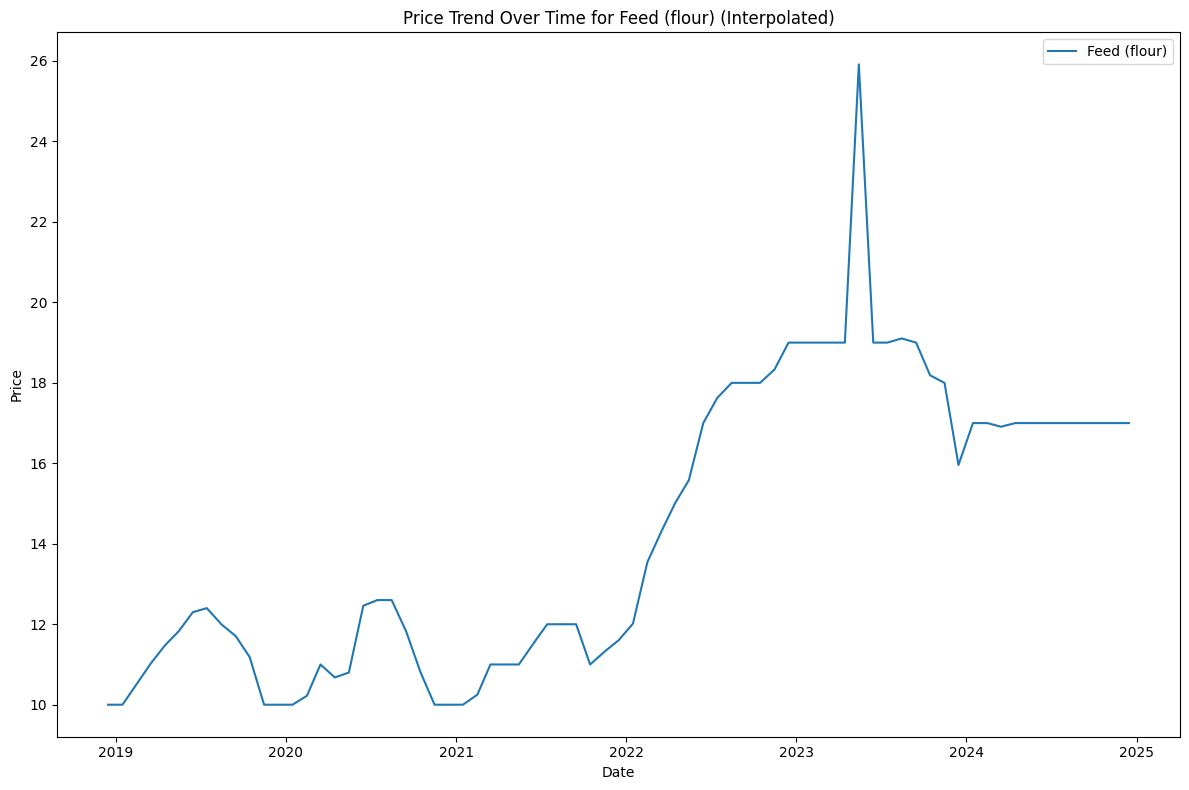

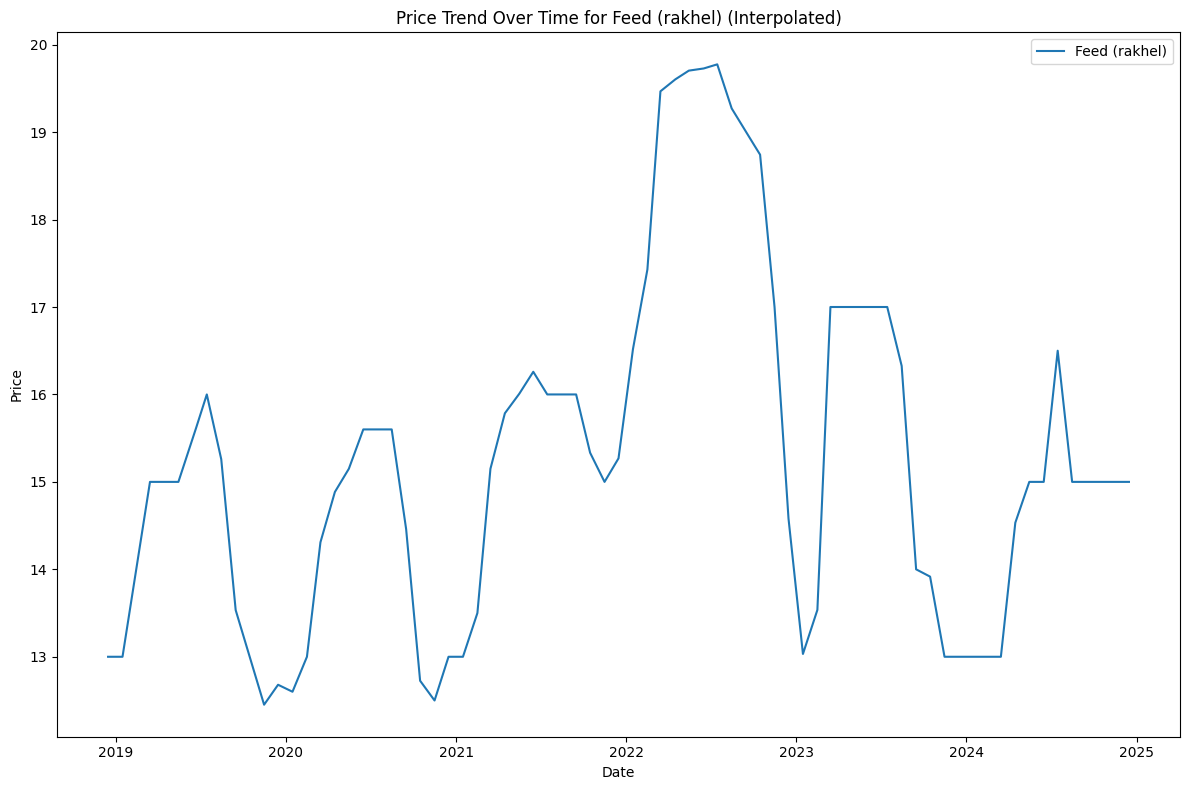

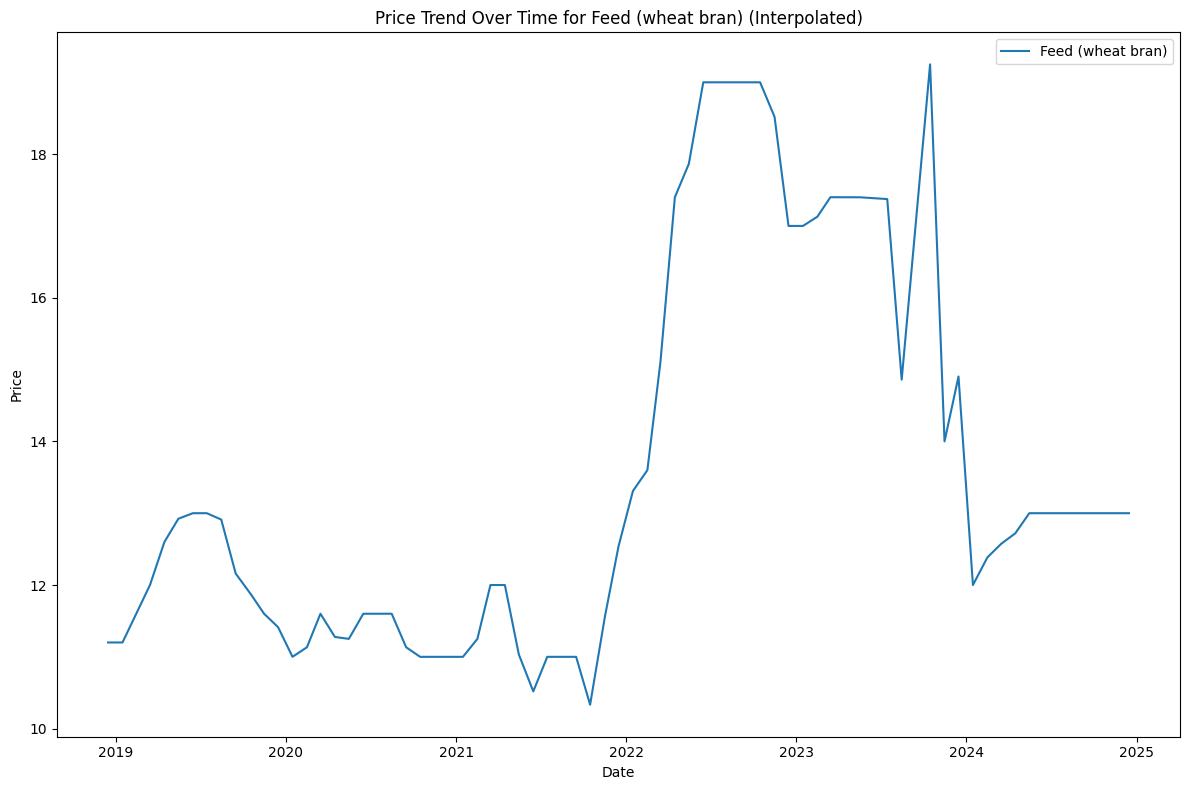

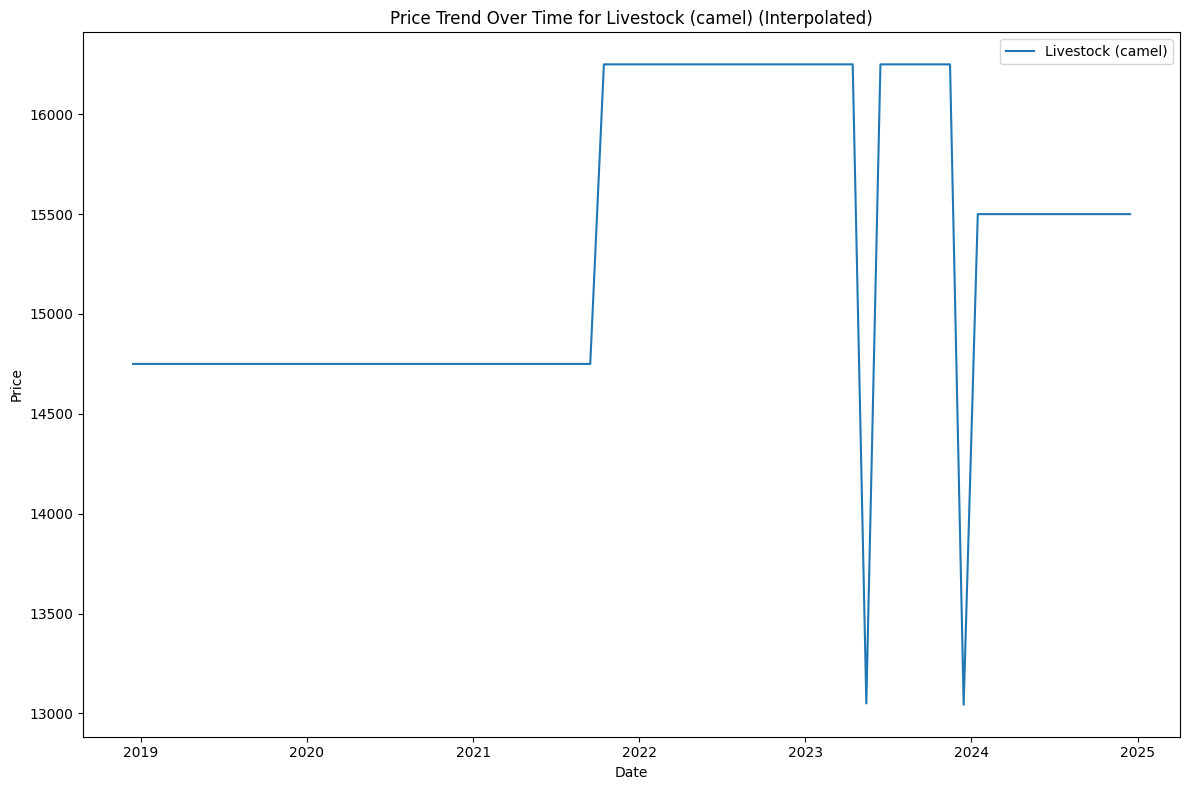

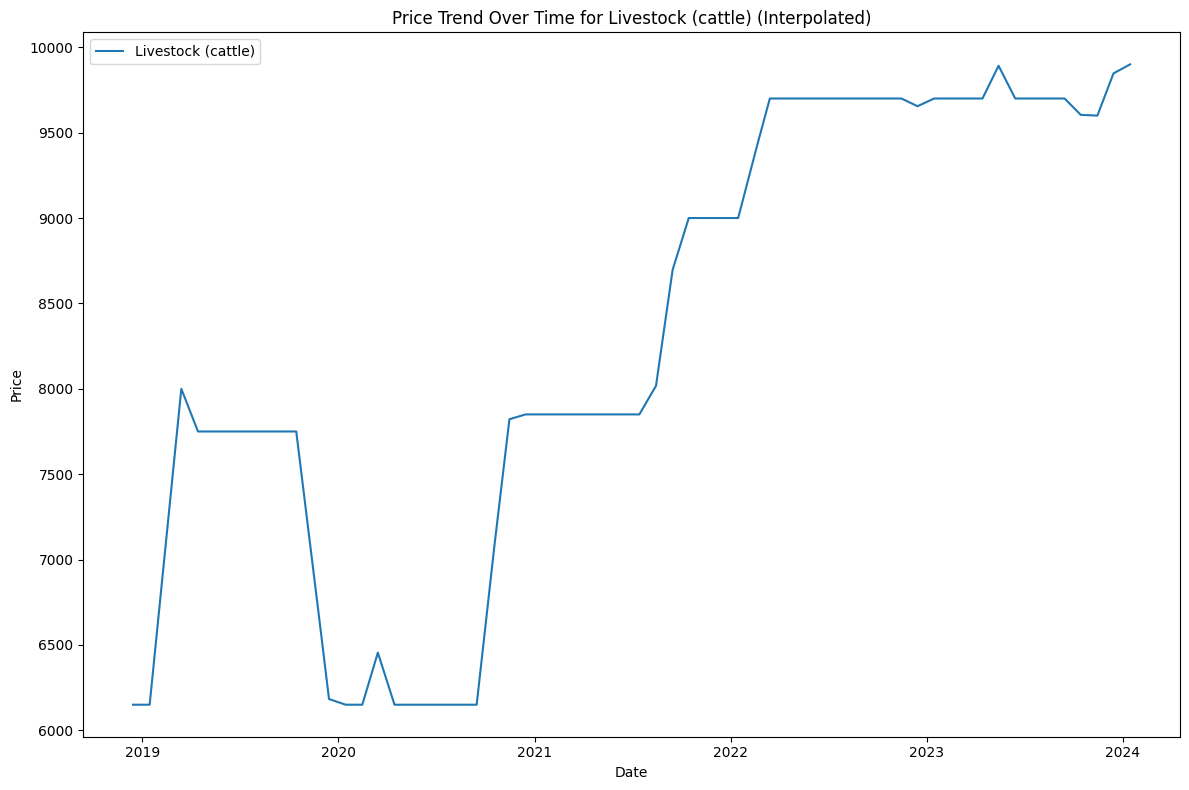

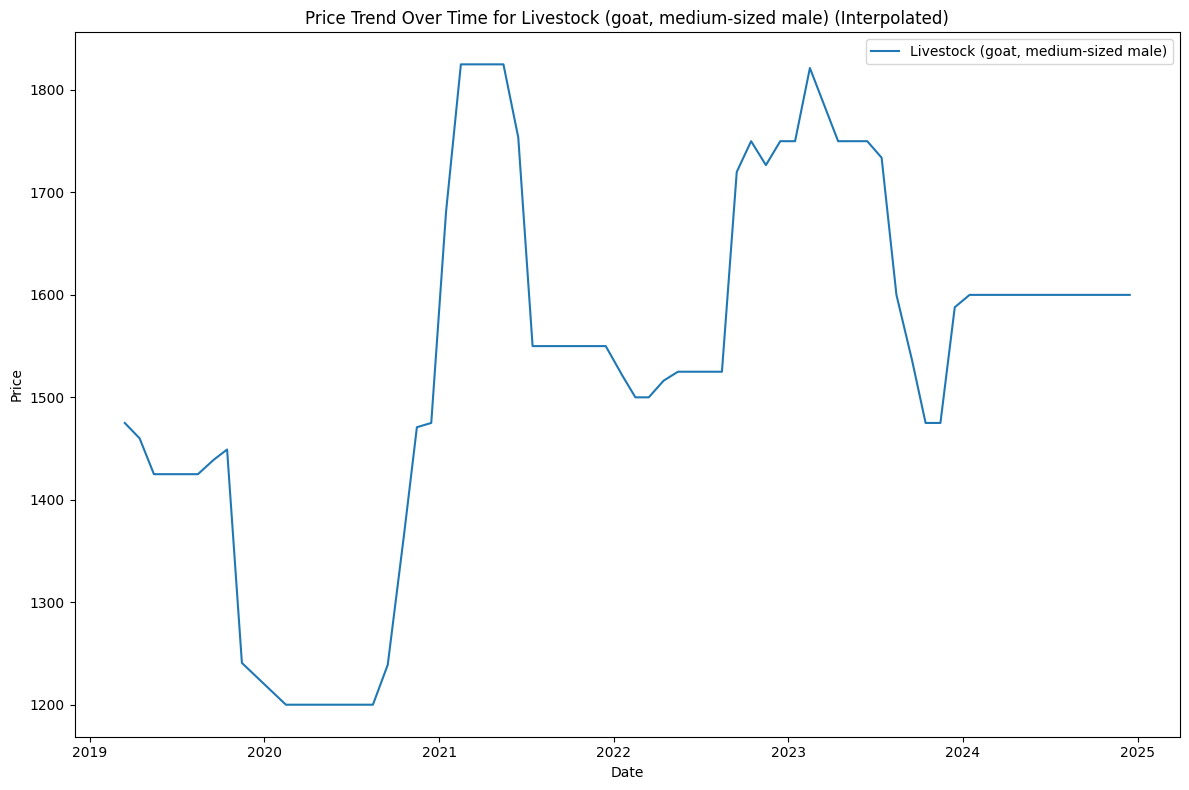

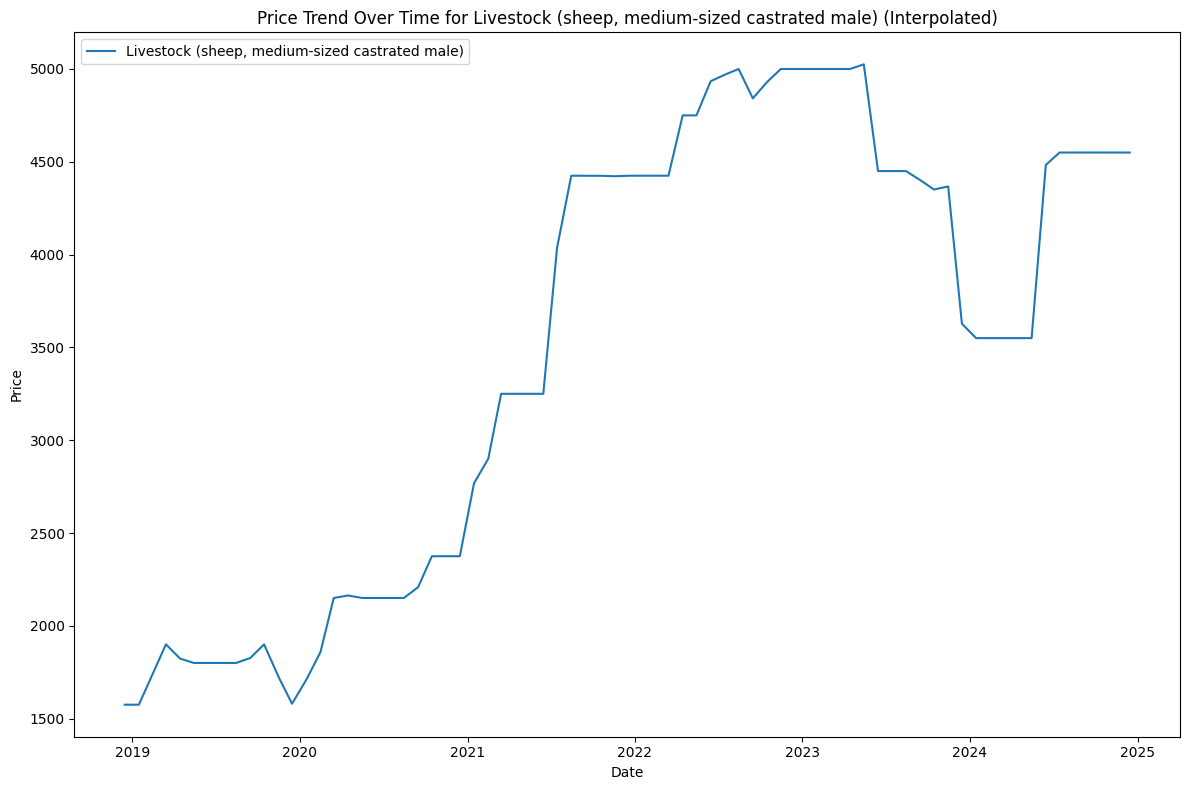

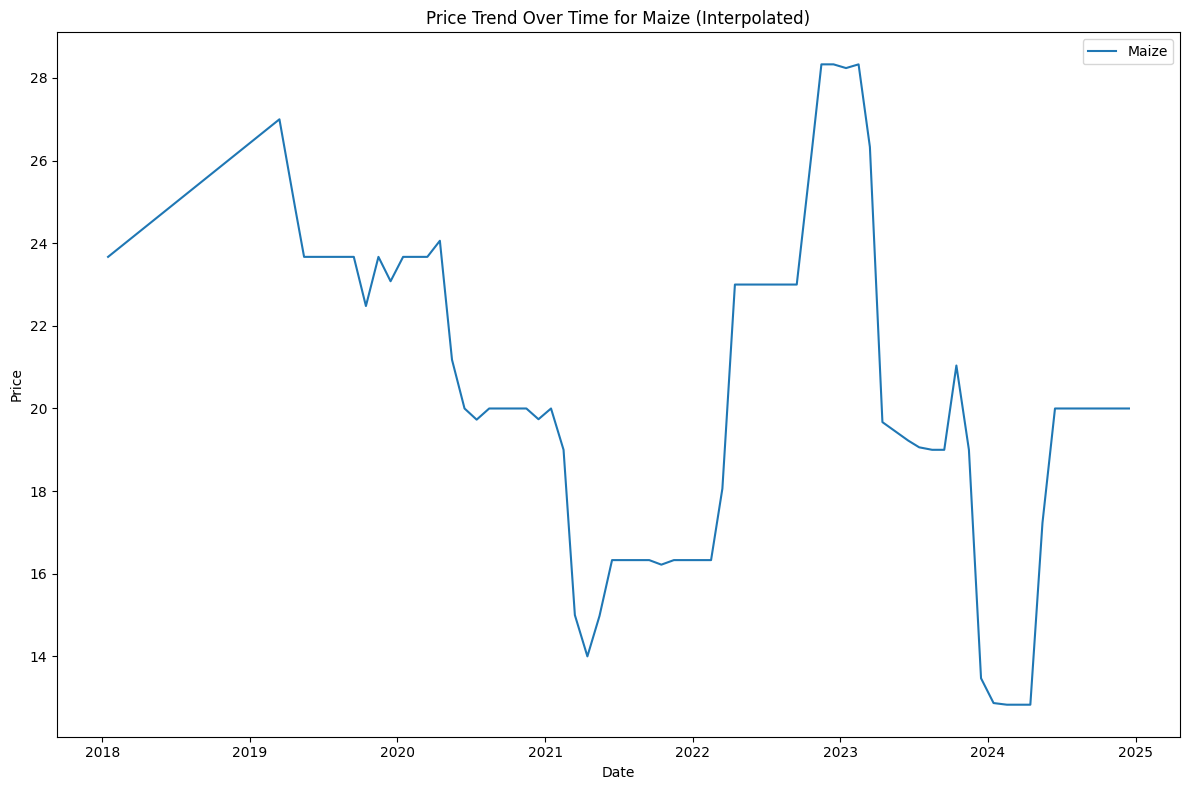

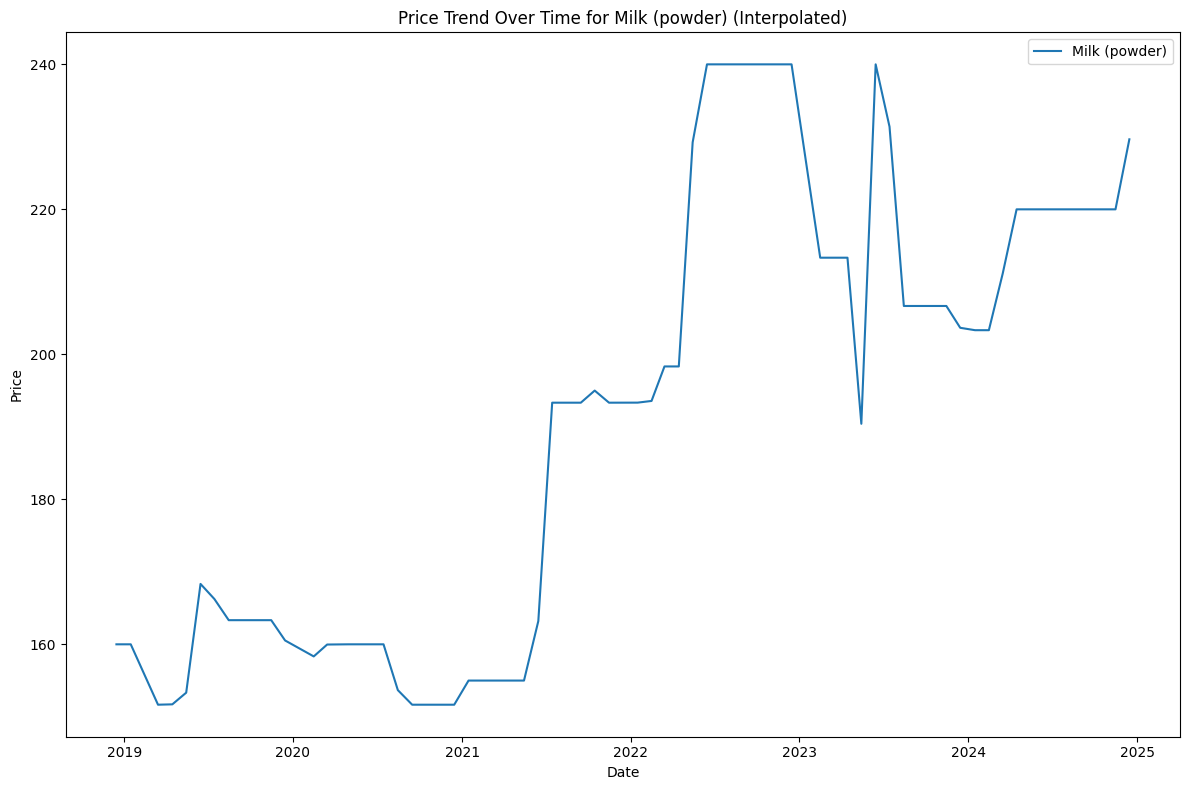

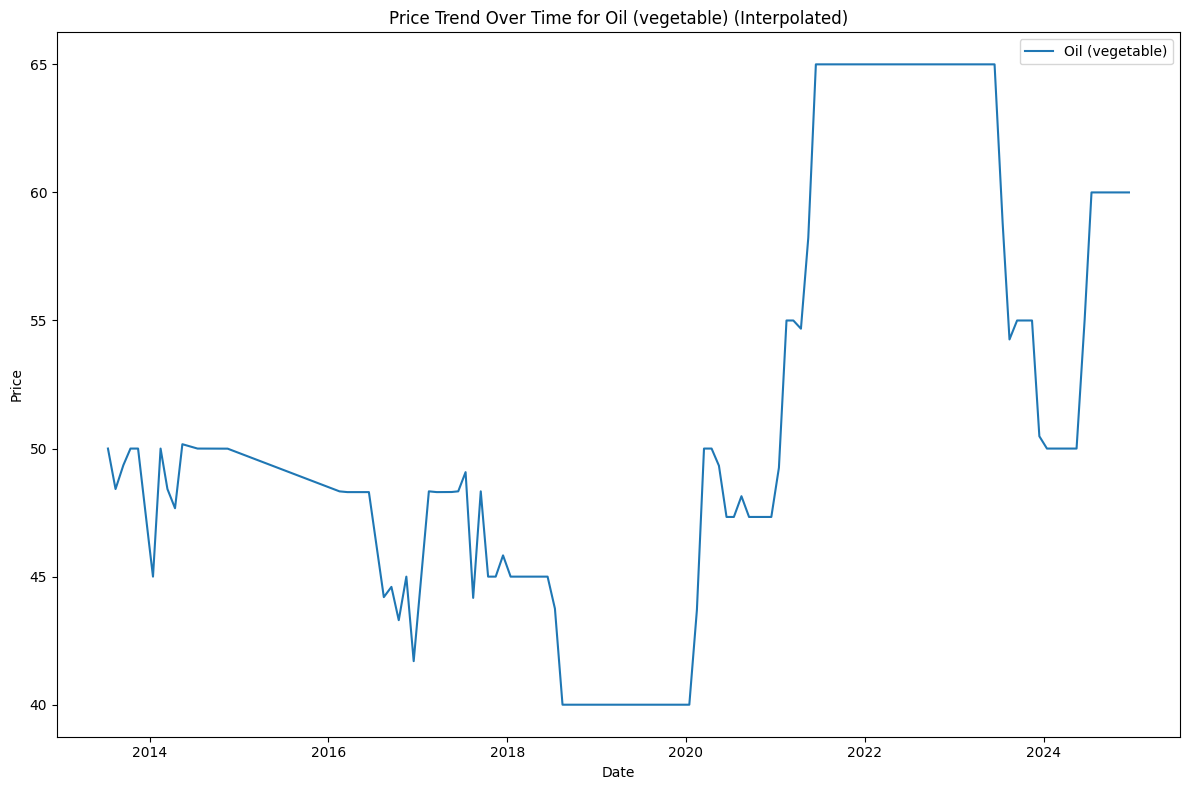

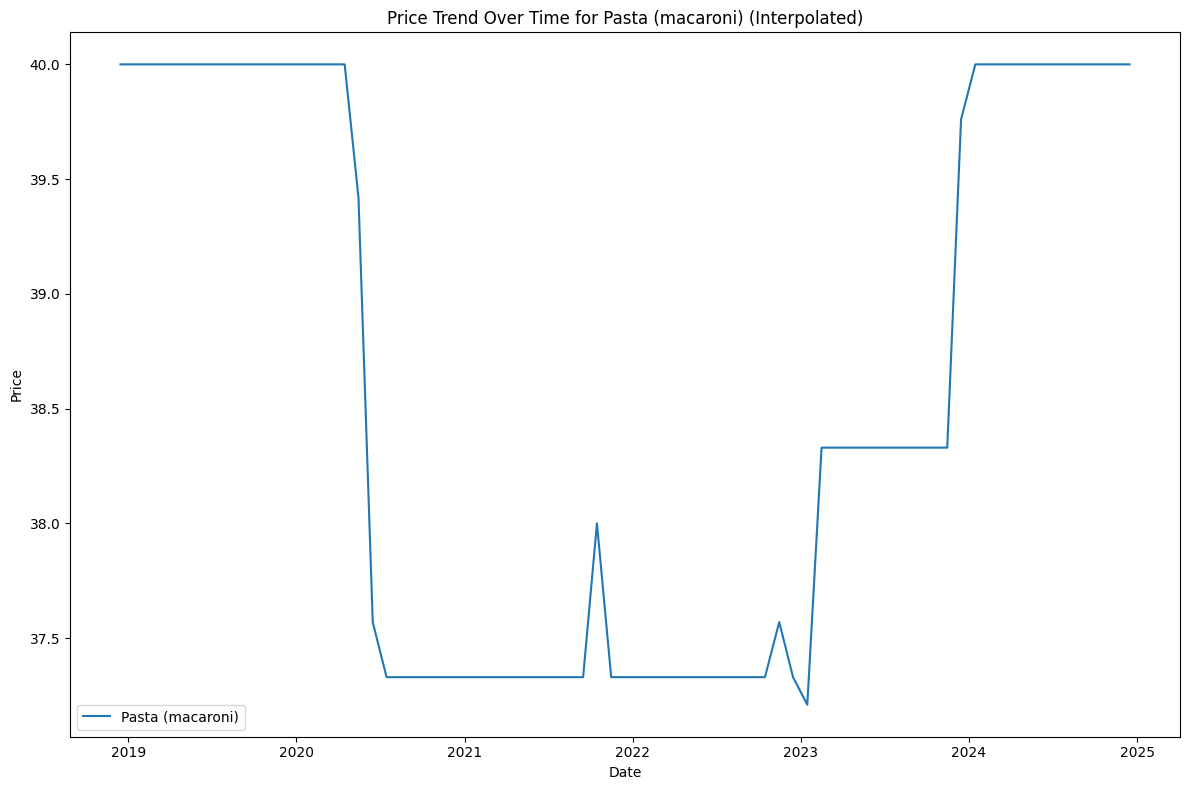

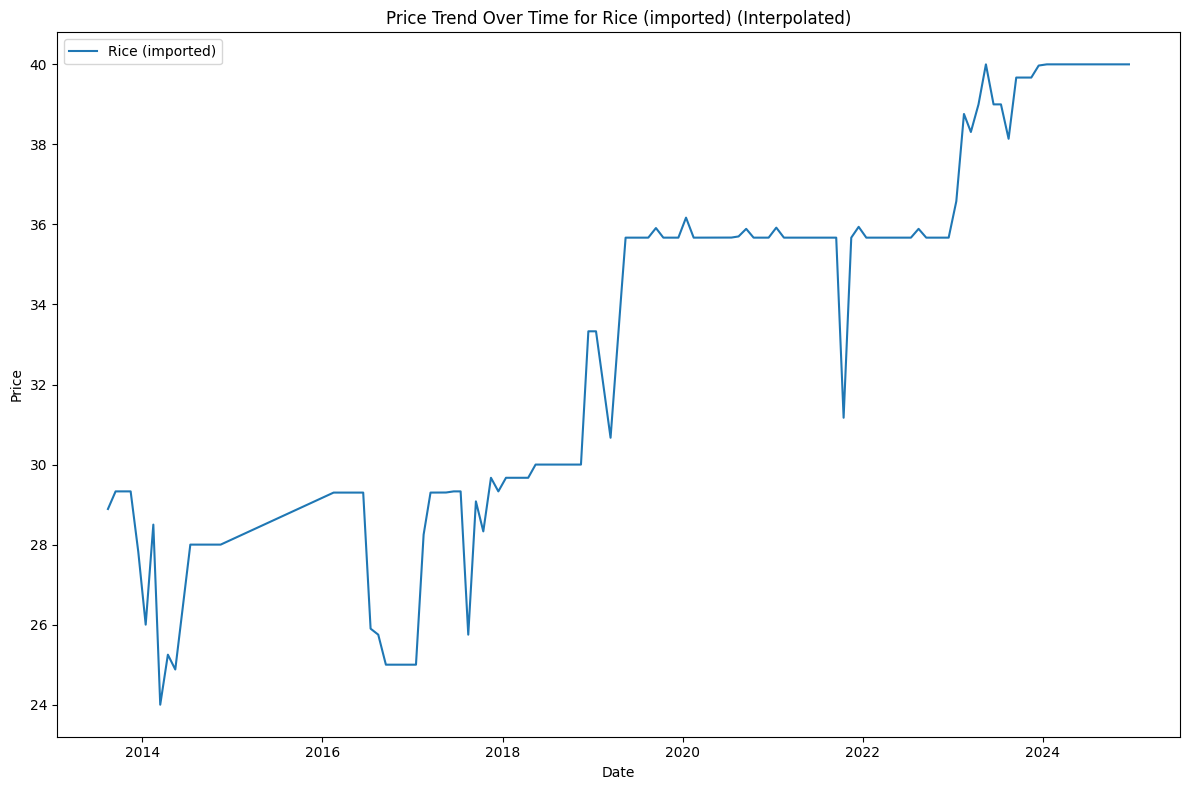

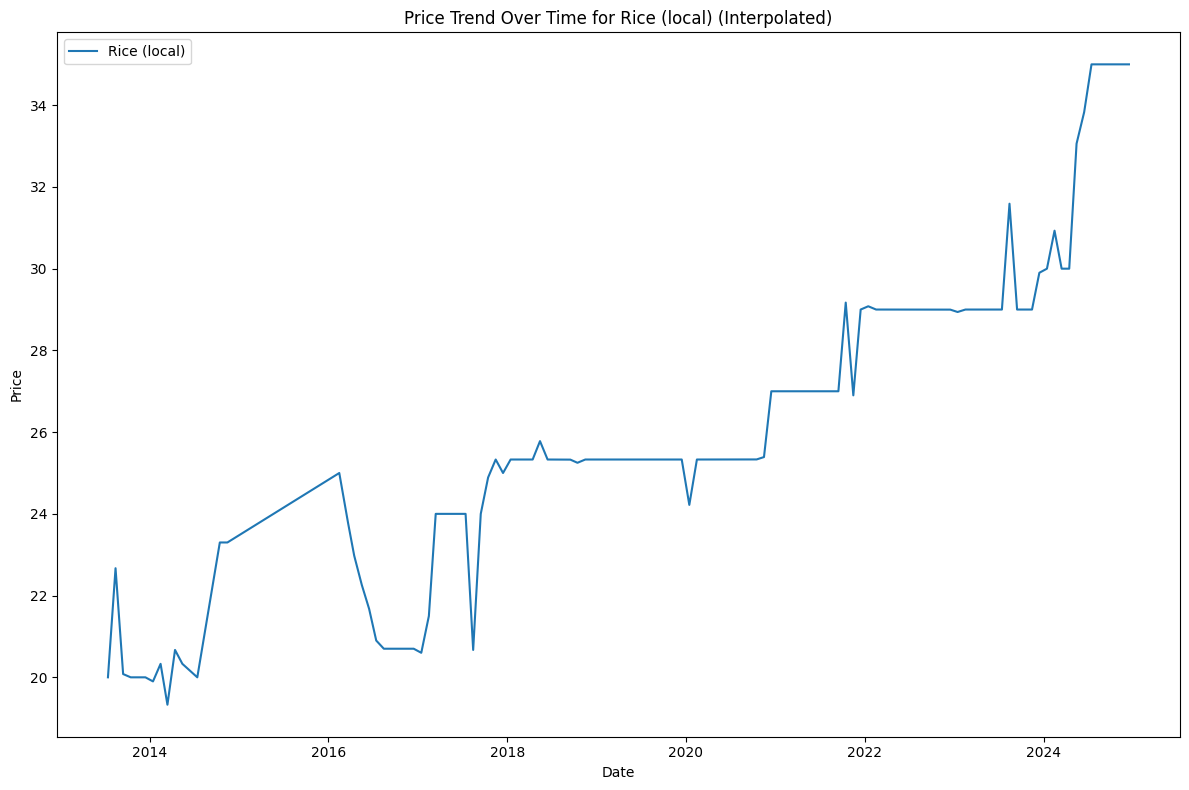

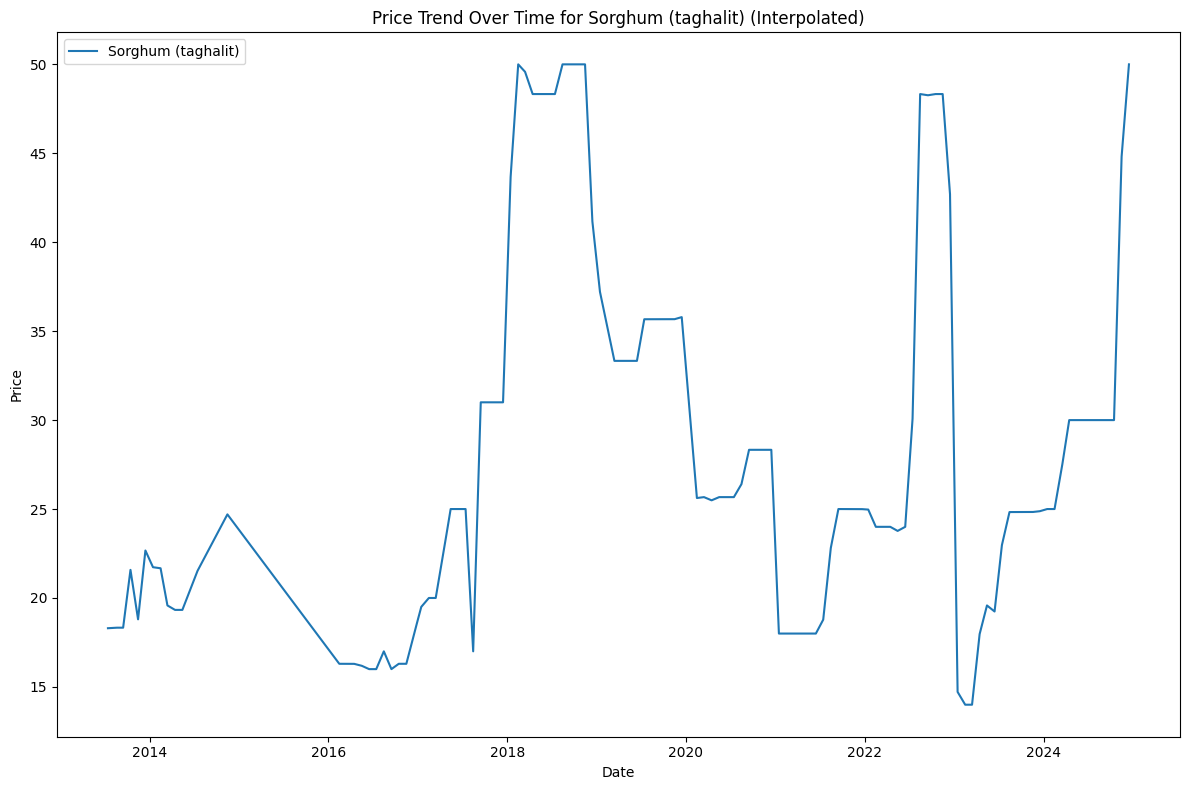

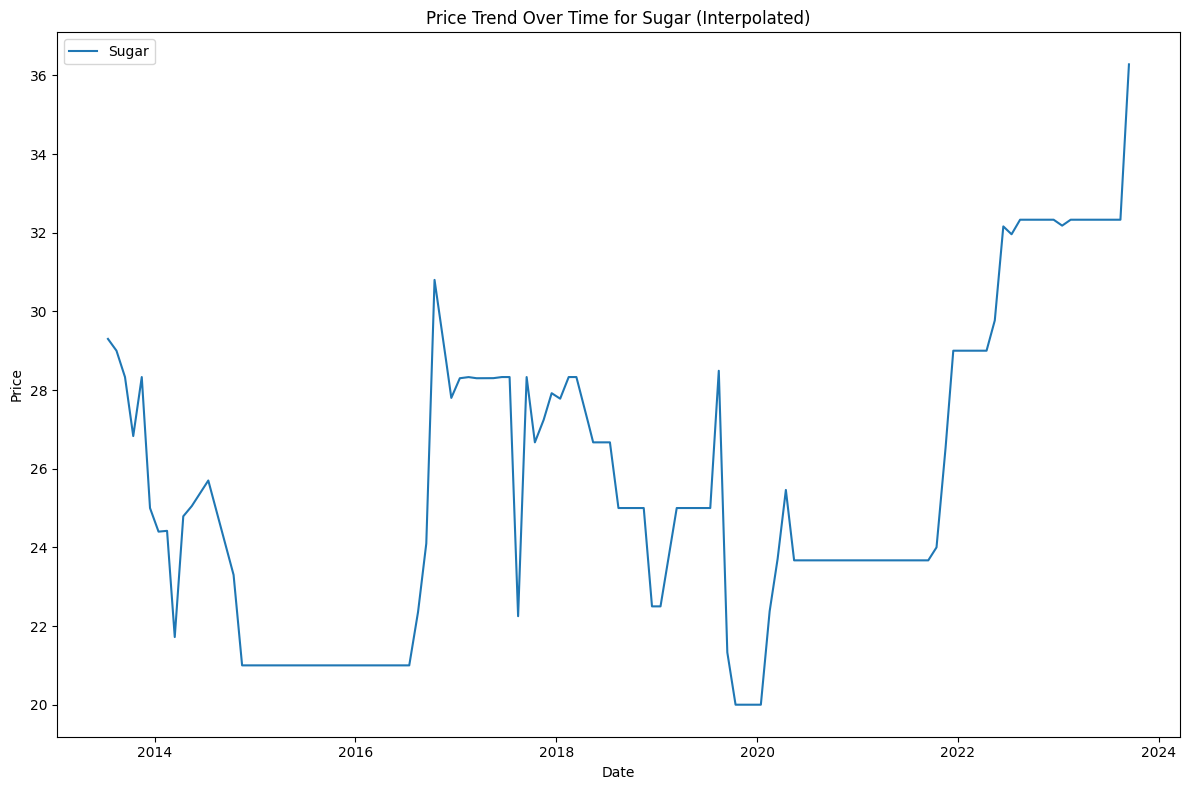

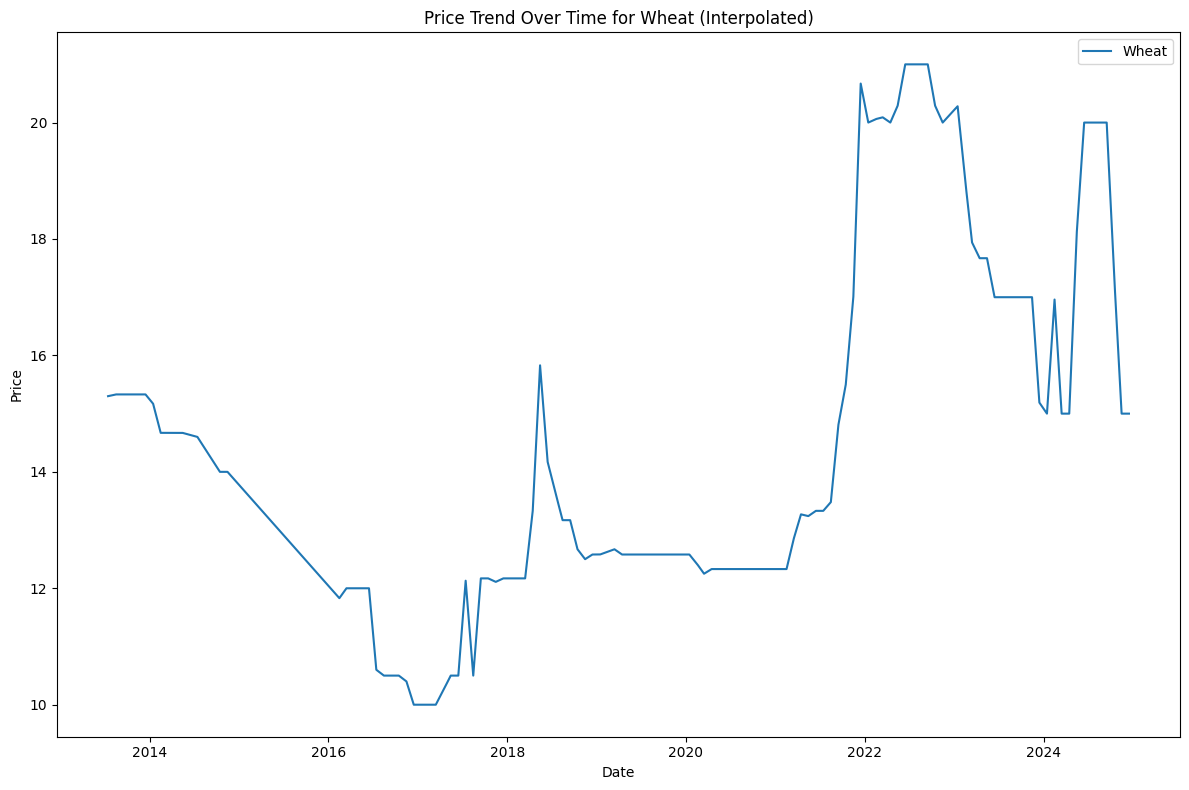

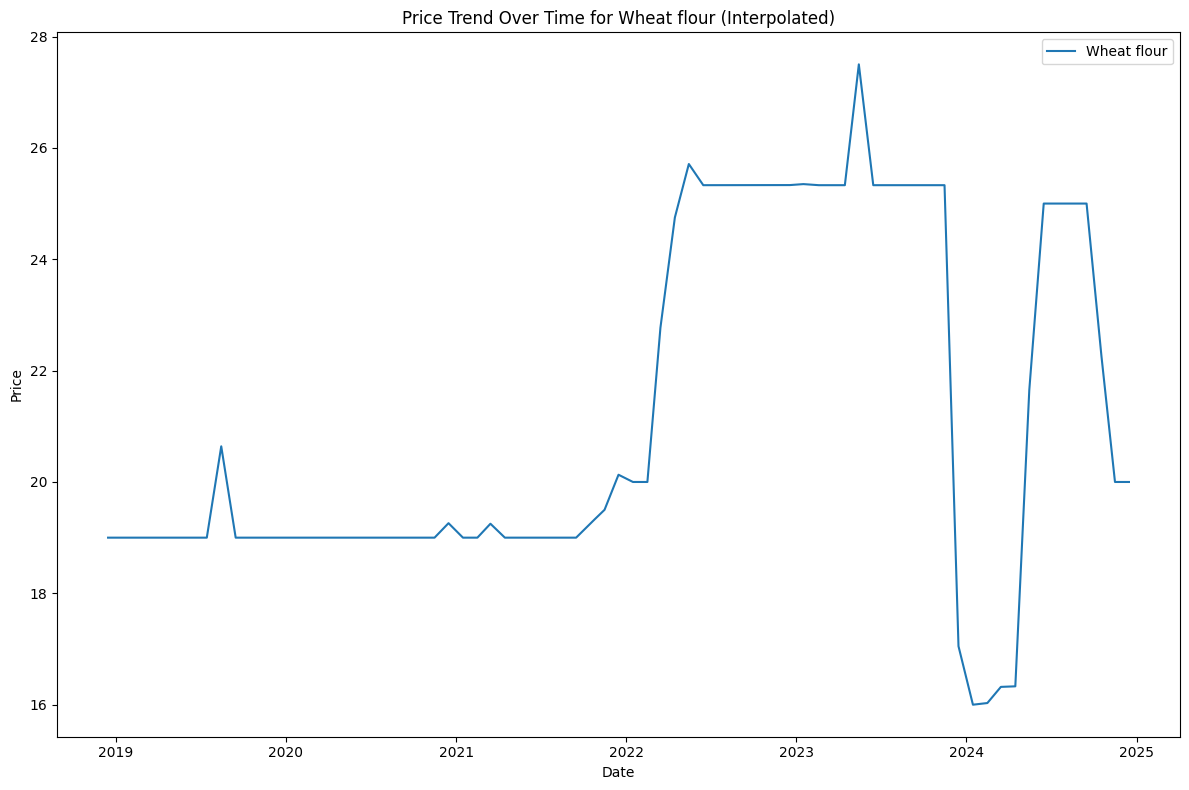

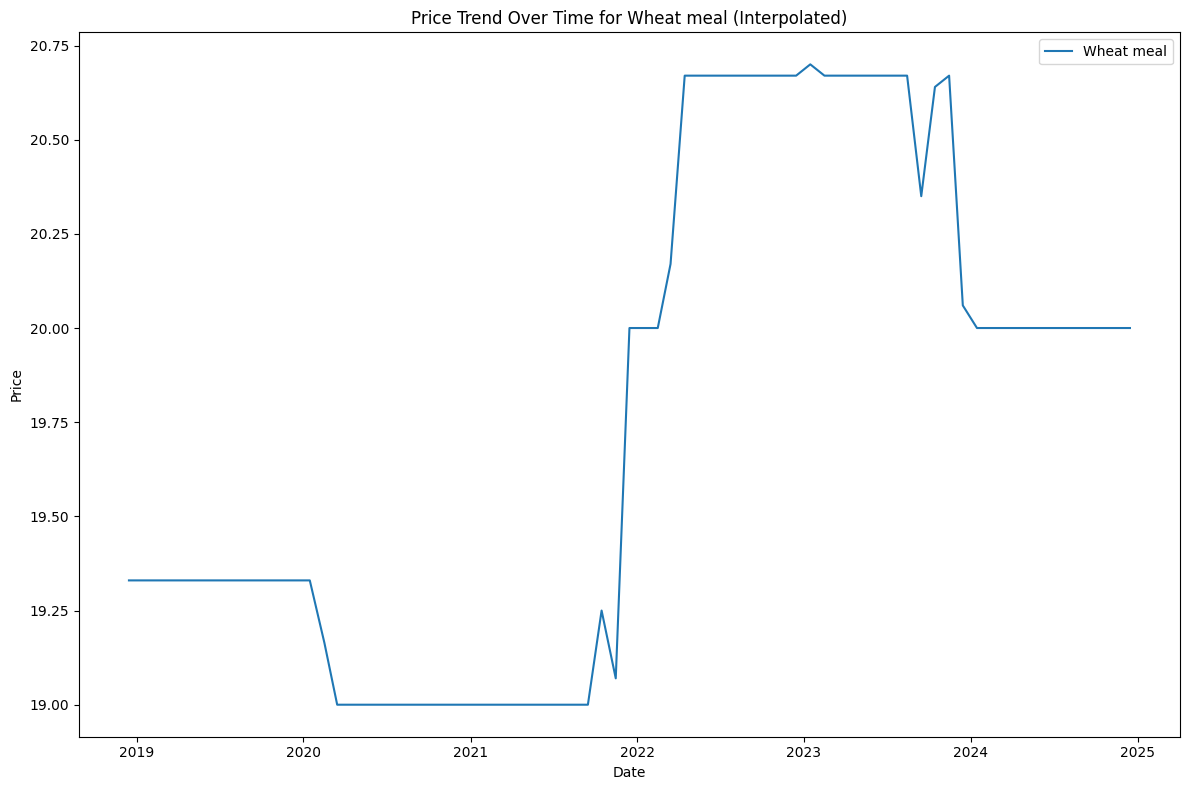

In [145]:
target_admin2 = admin2_names[1]

# Convert the reference period start to datetime for time-series analysis
df['date'] = pd.to_datetime(df['reference_period_start'])

# Select a subset of key commodities for the time-series plot
key_commodities = df['aggregated_commodity_name'].unique()

for commodity in key_commodities:
    subset = df[(df['aggregated_commodity_name'] == commodity) & (df['admin2_name'] == target_admin2)].sort_values('date')
    if not subset.empty:
        # Group by date to aggregate prices (e.g., using the mean for days with multiple records)
        
        
        subset_grouped = subset.groupby('date')['price'].mean()
        # Create a complete daily date range from the earliest to the latest date in the data
        full_range = pd.date_range(start=subset_grouped.index.min(), end=subset_grouped.index.max(), freq='D')
        # Reindex the grouped data to this full range
        subset_interp = subset_grouped.reindex(full_range)
        # Interpolate missing 'price' values using time-based interpolation
        subset_interp = subset_interp.interpolate(method='time')
        
        # Create a new figure for each commodity
        plt.figure(figsize=(12, 8))
        plt.plot(subset_interp.index, subset_interp.values, label=commodity)
        plt.title(f"Price Trend Over Time for {commodity} (Interpolated)")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.tight_layout()
        plt.show()


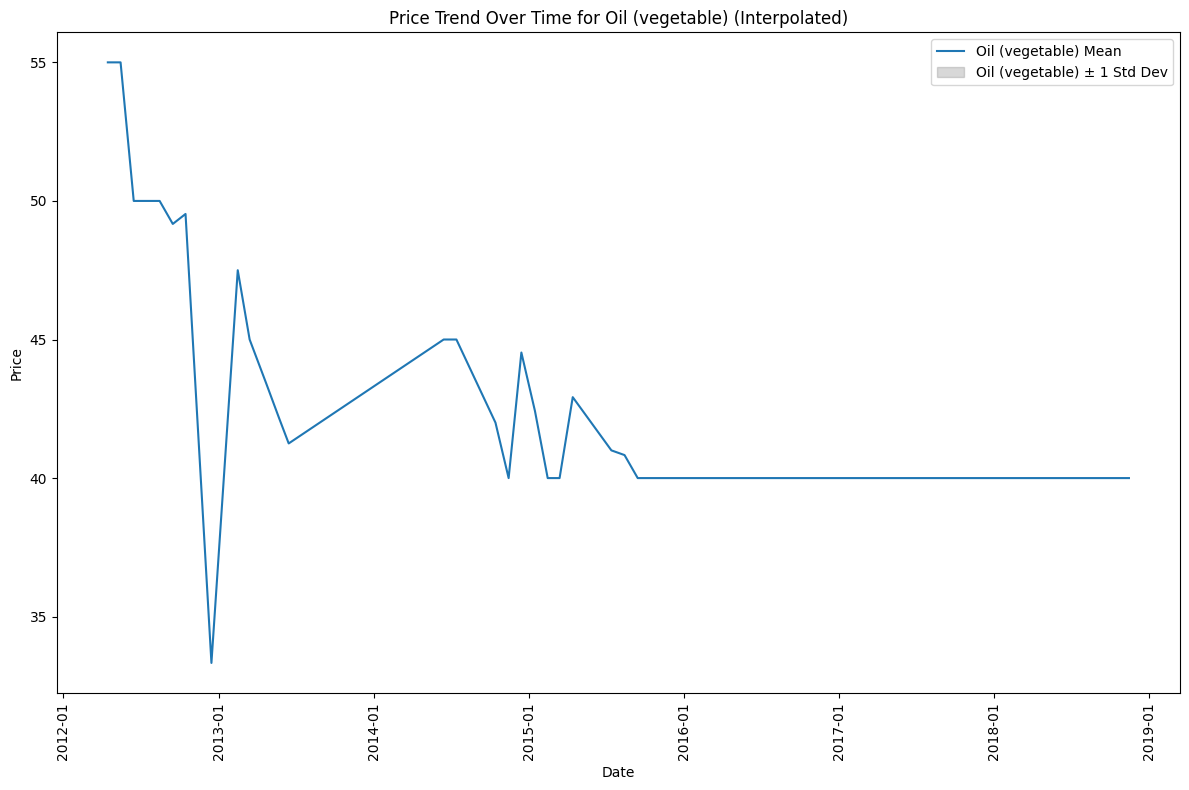

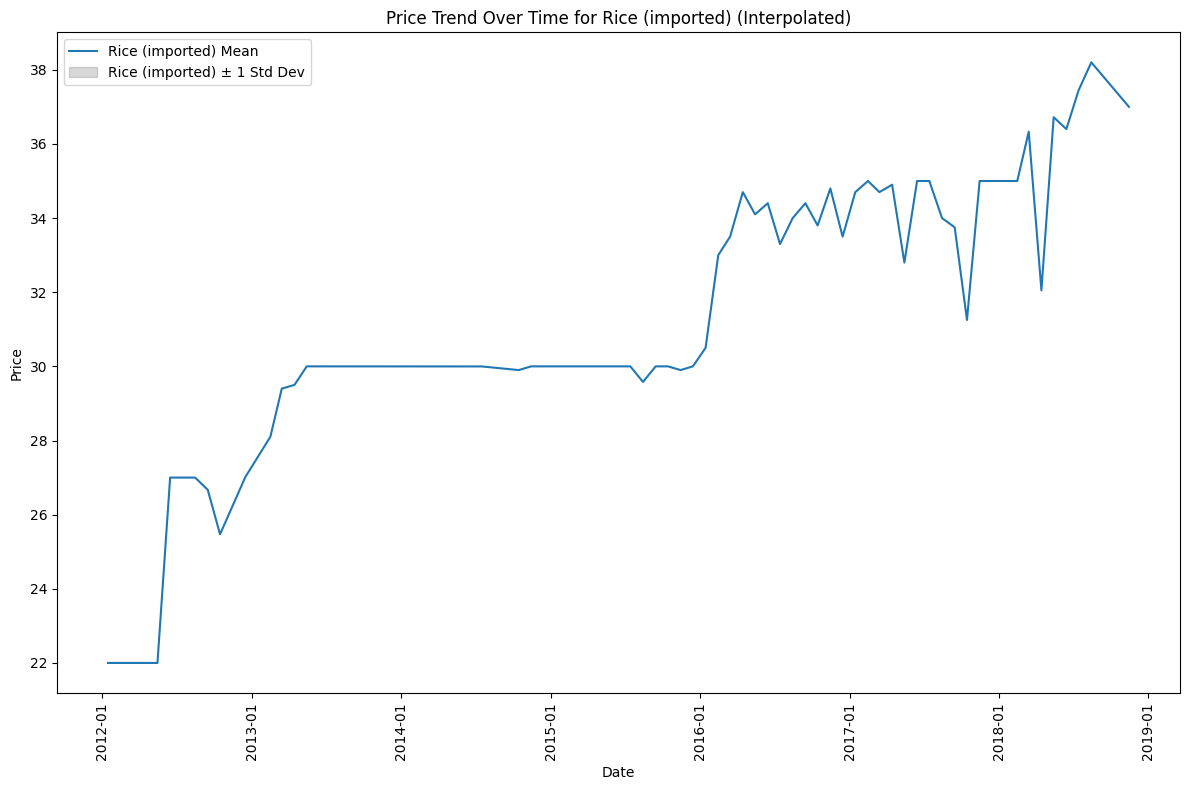

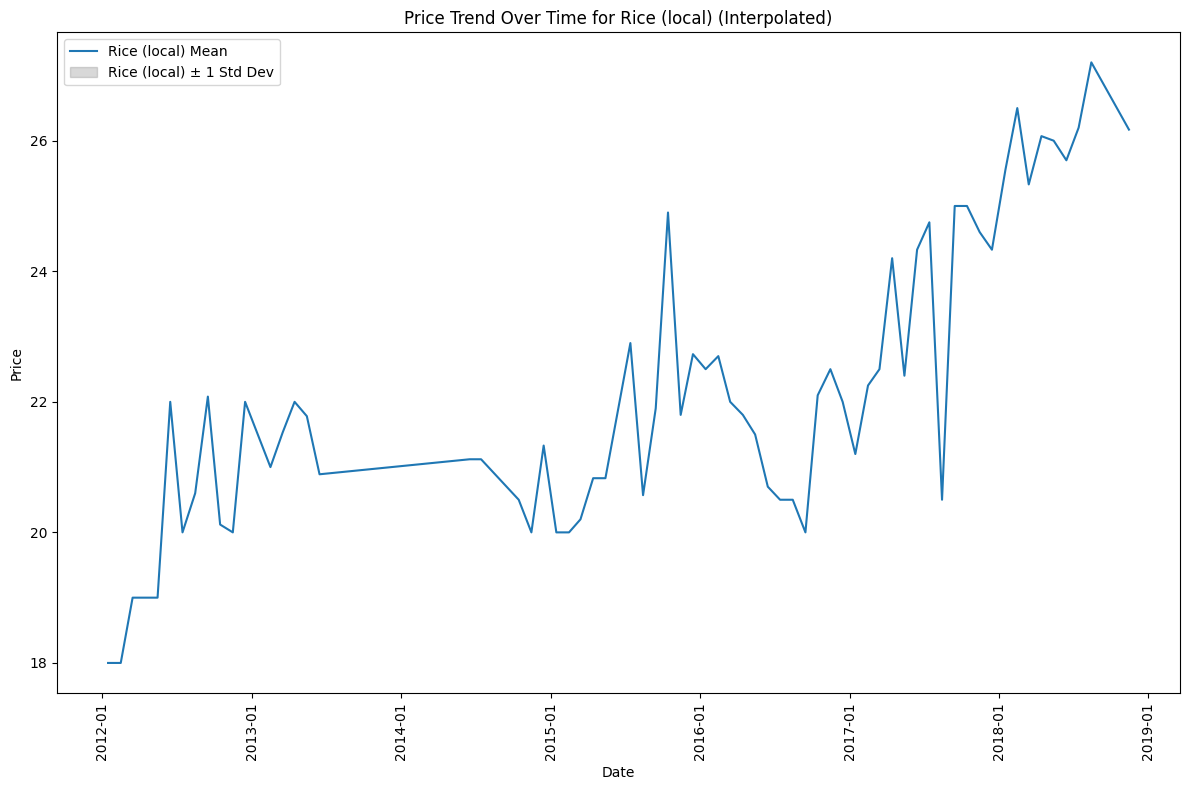

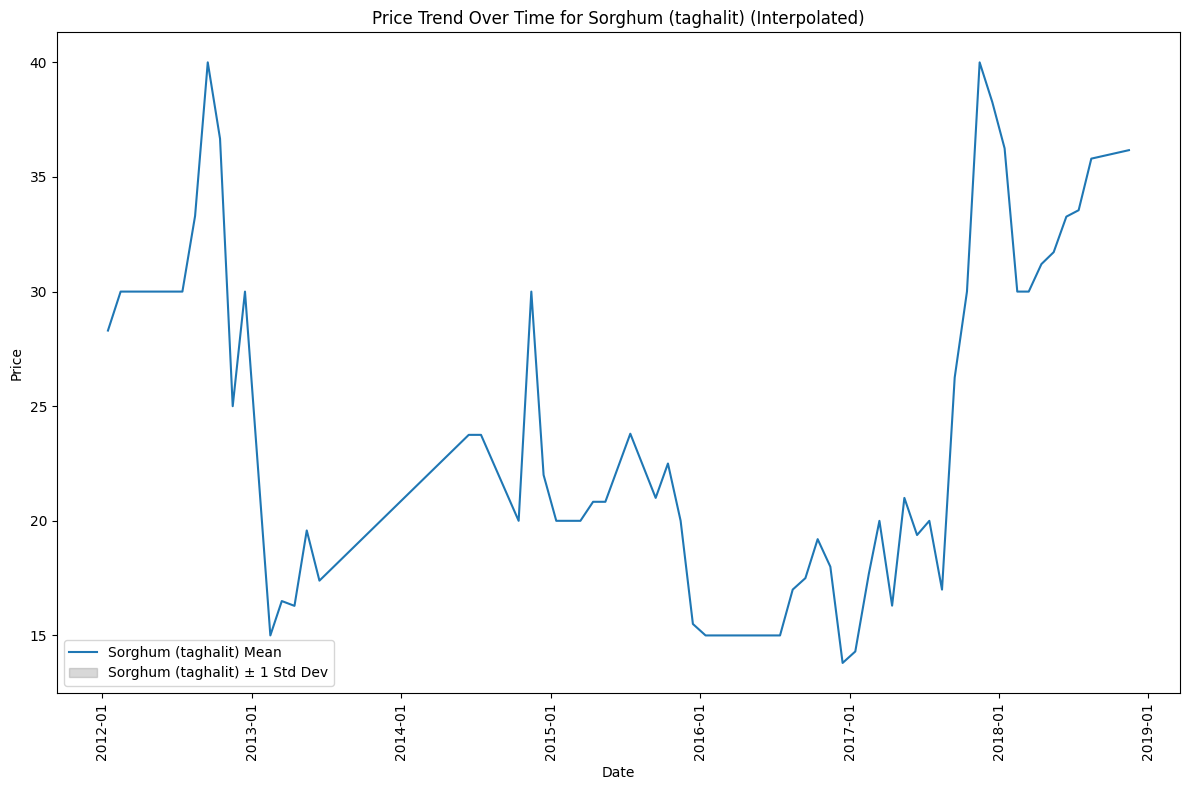

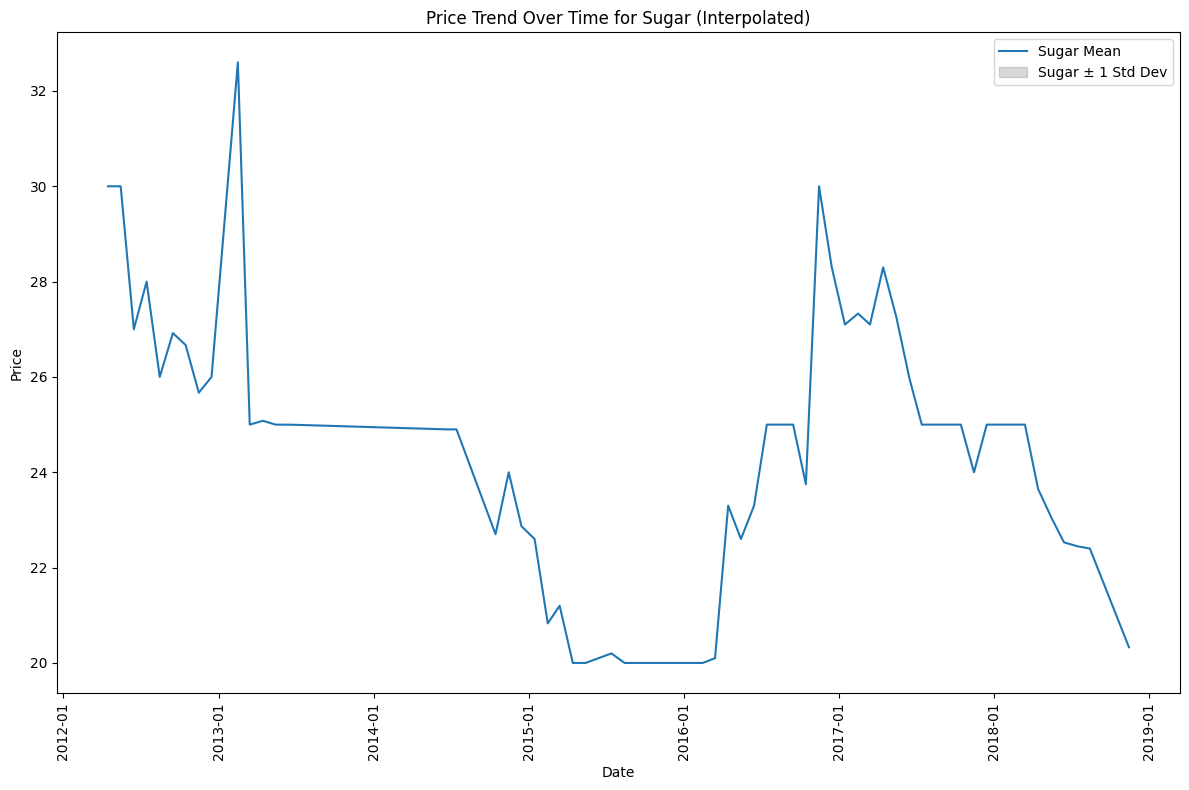

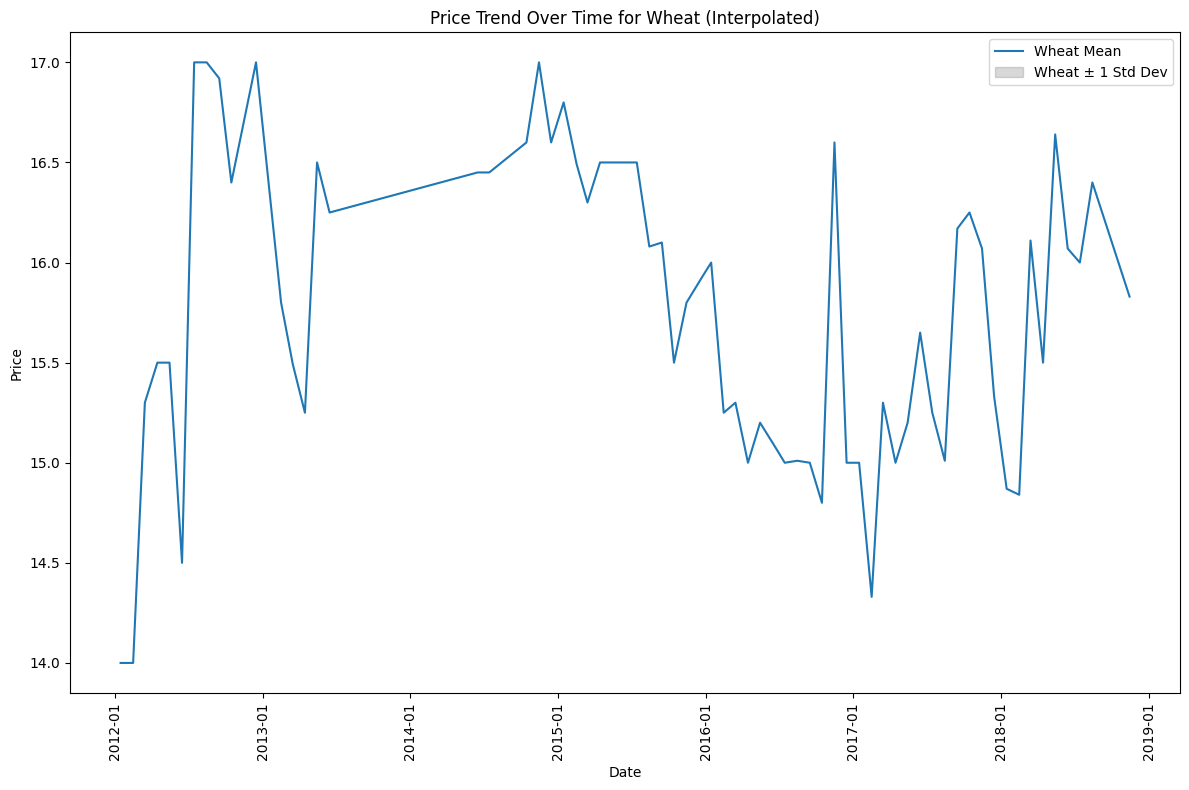

In [146]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Convert the reference period start to datetime for time-series analysis
df['date'] = pd.to_datetime(df['reference_period_start'])

# Select a subset of key commodities for the time-series plot
key_commodities = df['aggregated_commodity_name'].unique()

admin2_names = df['admin2_name'].unique()  # or use your aggregated column name

target_admin2 = admin2_names[-1]
for commodity in key_commodities:
    subset = df[(df['aggregated_commodity_name'] == commodity) & (df['admin2_name'] == target_admin2)].sort_values('date')
    if not subset.empty:
        # Group by date to aggregate prices (mean and standard deviation)
        grouped_mean = subset.groupby('date')['price'].mean()
        grouped_std = subset.groupby('date')['price'].std()
        
        # Create a complete daily date range from the earliest to the latest date in the data
        full_range = pd.date_range(start=grouped_mean.index.min(), end=grouped_mean.index.max(), freq='D')
        
        # Reindex the grouped data to this full range and interpolate missing values
        mean_interp = grouped_mean.reindex(full_range).interpolate(method='time')
        std_interp = grouped_std.reindex(full_range).interpolate(method='time')
        
        # Create a new figure for each commodity
        plt.figure(figsize=(12, 8))
        plt.plot(mean_interp.index, mean_interp.values, label=f'{commodity} Mean')
        
        # Plot a shaded area for mean ± std deviation
        plt.fill_between(mean_interp.index,
                         mean_interp.values - std_interp.values,
                         mean_interp.values + std_interp.values,
                         color='gray', alpha=0.3, label=f'{commodity} ± 1 Std Dev')
        
        plt.title(f"Price Trend Over Time for {commodity} (Interpolated)")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        
        # Format x-axis: set date format and rotate labels vertically
        ax = plt.gca()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.xticks(rotation=90)
        
        plt.tight_layout()
        plt.show()

In [147]:
subset = df[(df['aggregated_commodity_name'] == commodity) & (df['admin2_name'] == target_admin2)]

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 688 to 2087
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   provider_admin2_name       2046 non-null   object        
 1   admin2_code                2046 non-null   object        
 2   admin2_name                2046 non-null   object        
 3   market_name                2046 non-null   object        
 4   lat                        2046 non-null   float64       
 5   lon                        2046 non-null   float64       
 6   commodity_category         2046 non-null   object        
 7   commodity_name             2046 non-null   object        
 8   unit                       2046 non-null   object        
 9   price_flag                 2046 non-null   object        
 10  currency_code              2046 non-null   object        
 11  price                      2046 non-null   float64       
 12  reference

In [149]:
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load Data and Define Anchor Points
# ---------------------------
df['reference_period_start'] = pd.to_datetime(df['reference_period_start'])
# Use the reference_period_start as our anchor date.
df['date'] = df['reference_period_start']

# ---------------------------
# 2. Set the Interpolation Frequency
# ---------------------------
frequency = 'W'  # For weekly interpolation

# ---------------------------
# 3. Process Each Group: Kalman Smoothing on Anchors, then np.interp, then add noise
# ---------------------------
dfs = []  # List to hold the interpolated DataFrames for each group

# Loop over each combination of admin2_name and aggregated_commodity_name.
for (admin, commodity, unit, lat, lon, price_flag, commodity_category,currency_code), group in df.groupby(['admin2_name', 'aggregated_commodity_name', 'unit', 'lat', 'lon', 'price_flag', 'commodity_category', 'currency_code']):
    # Sort the group by date and drop duplicate anchor points.
    group = group.sort_values('date').drop_duplicates(subset='date', keep='first')
    if group.empty:
        continue

    # Create a full continuous date range (weekly) between the first and last anchor dates.
    full_range = pd.date_range(start=group['date'].min(), end=group['date'].max(), freq=frequency)

    # Convert the anchor dates to numeric values (Unix timestamp in seconds).
    anchor_times = group['date'].values.astype('datetime64[s]').astype(np.int64)
    anchor_prices = group['price'].values

    # ---------------------------
    # 3a. Kalman Smoothing on the Anchor Points
    # ---------------------------
    initial_state = anchor_prices[0]
    kf = KalmanFilter(
        transition_matrices=[1],
        observation_matrices=[1],
        initial_state_mean=initial_state,
        initial_state_covariance=1,
        observation_covariance=1,
        # Increase the transition covariance to allow more erratic behavior.
        transition_covariance=2
    )
    state_means, _ = kf.smooth(anchor_prices)
    smoothed_anchor_prices = state_means.flatten()

    # ---------------------------
    # 3b. Interpolate Between the Smoothed Anchor Points
    # ---------------------------
    # Convert the full_range dates to numeric timestamps.
    full_times = full_range.values.astype('datetime64[s]').astype(np.int64)
    # Use NumPy's linear interpolation over the full time range using the smoothed anchor values.
    interpolated_prices = np.interp(full_times, anchor_times, smoothed_anchor_prices)
    
    # ---------------------------
    # 3c. Add Small Random Noise (Oscillations)
    # ---------------------------
    # Define noise scale as a fraction (e.g., 10%) of the standard deviation of the anchor prices.
    noise_scale = 0.02 * np.std(anchor_prices) if len(anchor_prices) > 1 else 0
    noise = np.random.normal(0, noise_scale, size=interpolated_prices.shape)
    interpolated_prices_noisy = interpolated_prices + noise

    # Build a new DataFrame for this group.
    df_group = pd.DataFrame({
        'date': full_range,
        'price': interpolated_prices_noisy,
        'unit': unit,
        'commodity_category': commodity_category,
        'lat': lat,
        'lon': lon,
        'price_flag':price_flag,
        'admin2_name': admin,
        'aggregated_commodity_name': commodity,
        'currency_code': currency_code
    })
    dfs.append(df_group)

# Combine all the group-specific DataFrames.
df_interpolated = pd.concat(dfs, ignore_index=True)

In [150]:
df_interpolated['unit'].unique()

array(['KG', 'Head', 'L'], dtype=object)

In [151]:
df_interpolated.loc[df_interpolated['unit'] == 'Head', 'price'] = df_interpolated.loc[df_interpolated['unit'] == 'Head', 'price'].astype(int)

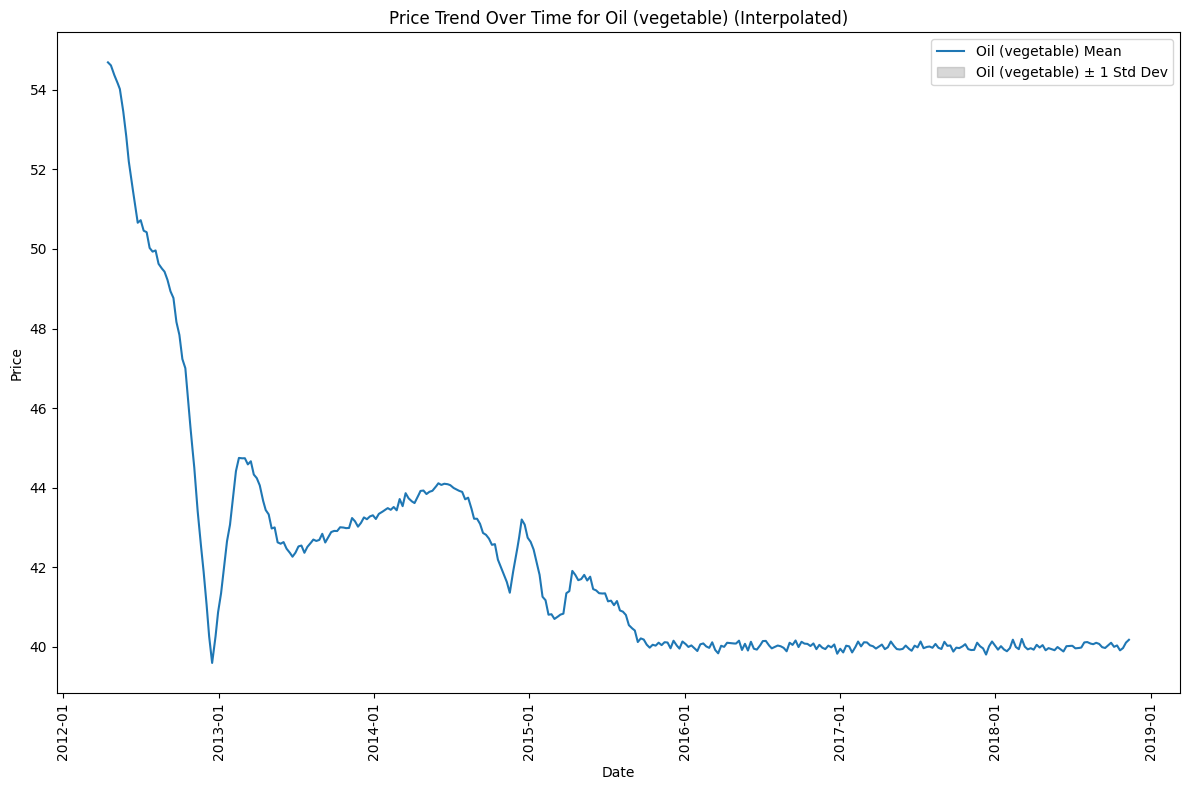

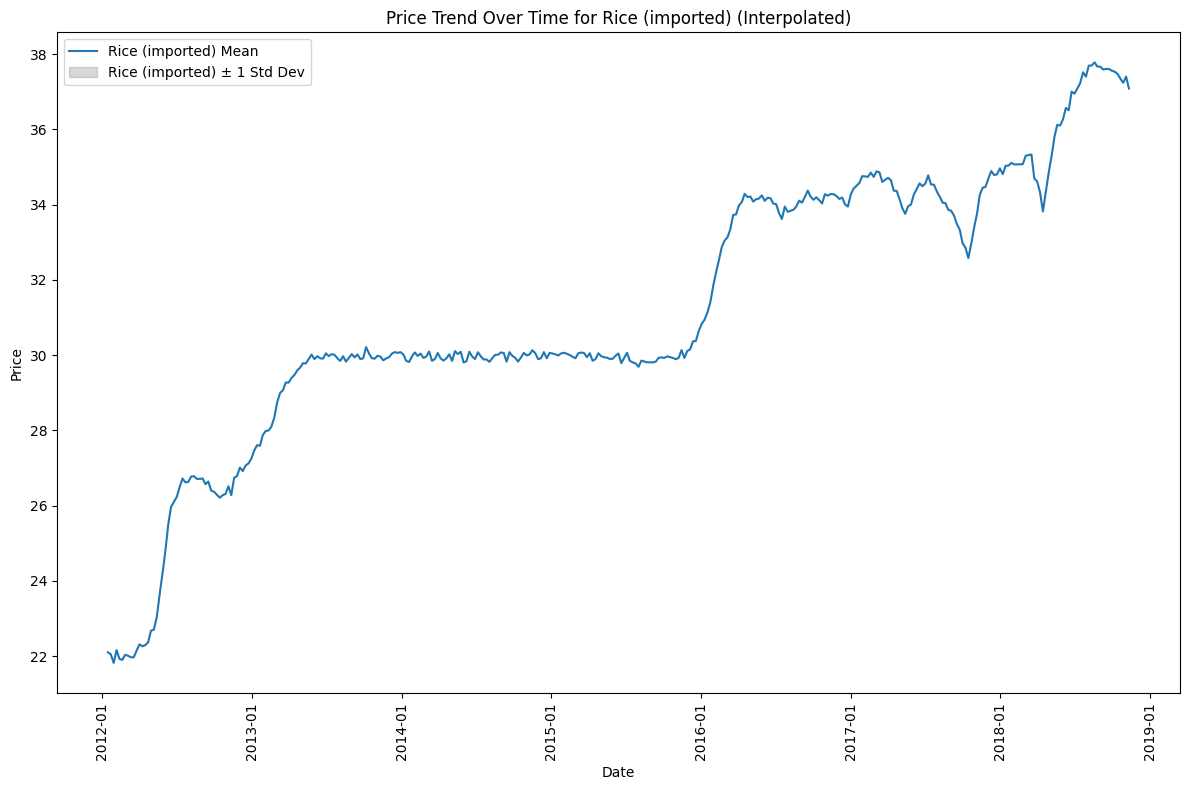

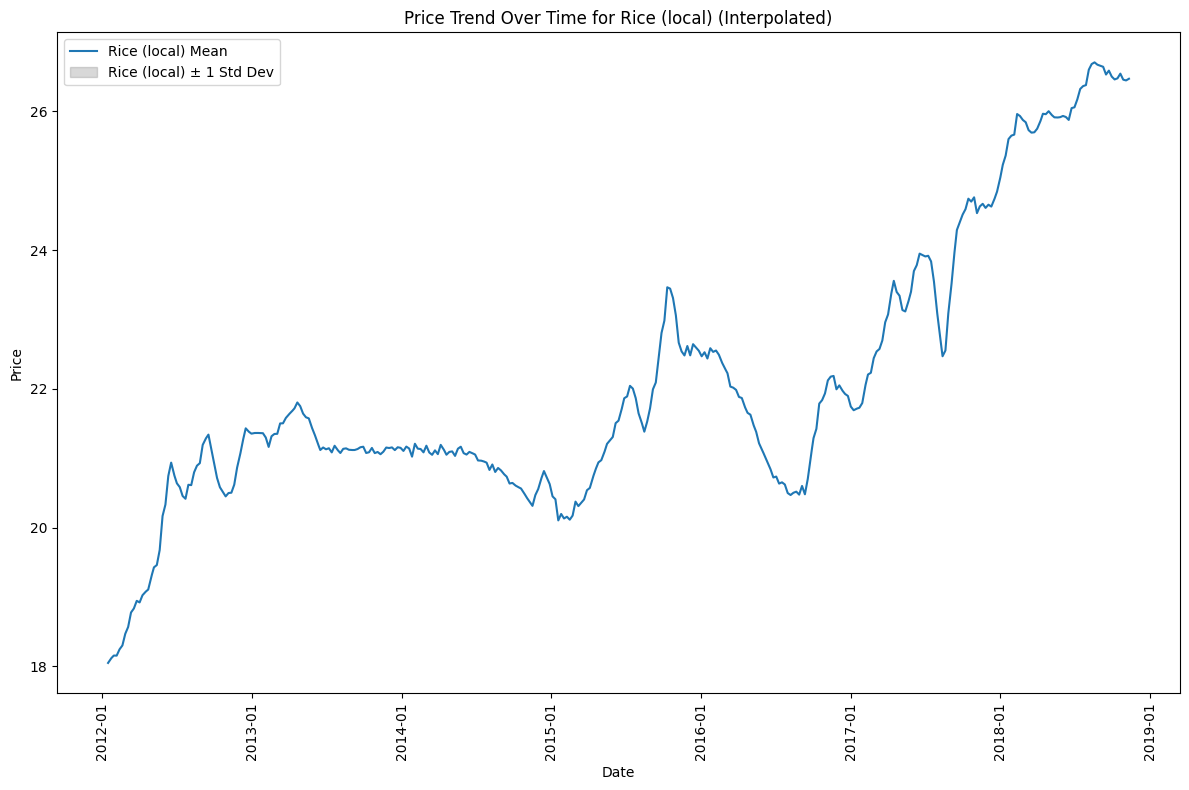

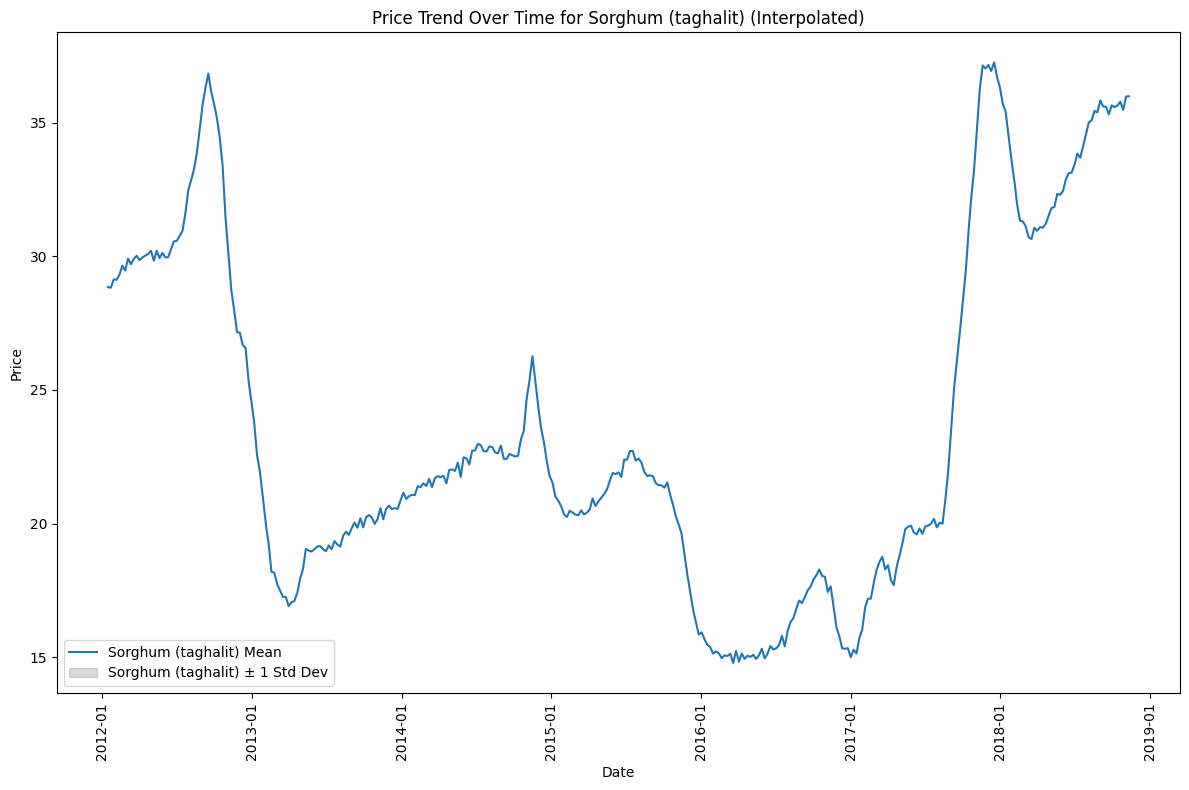

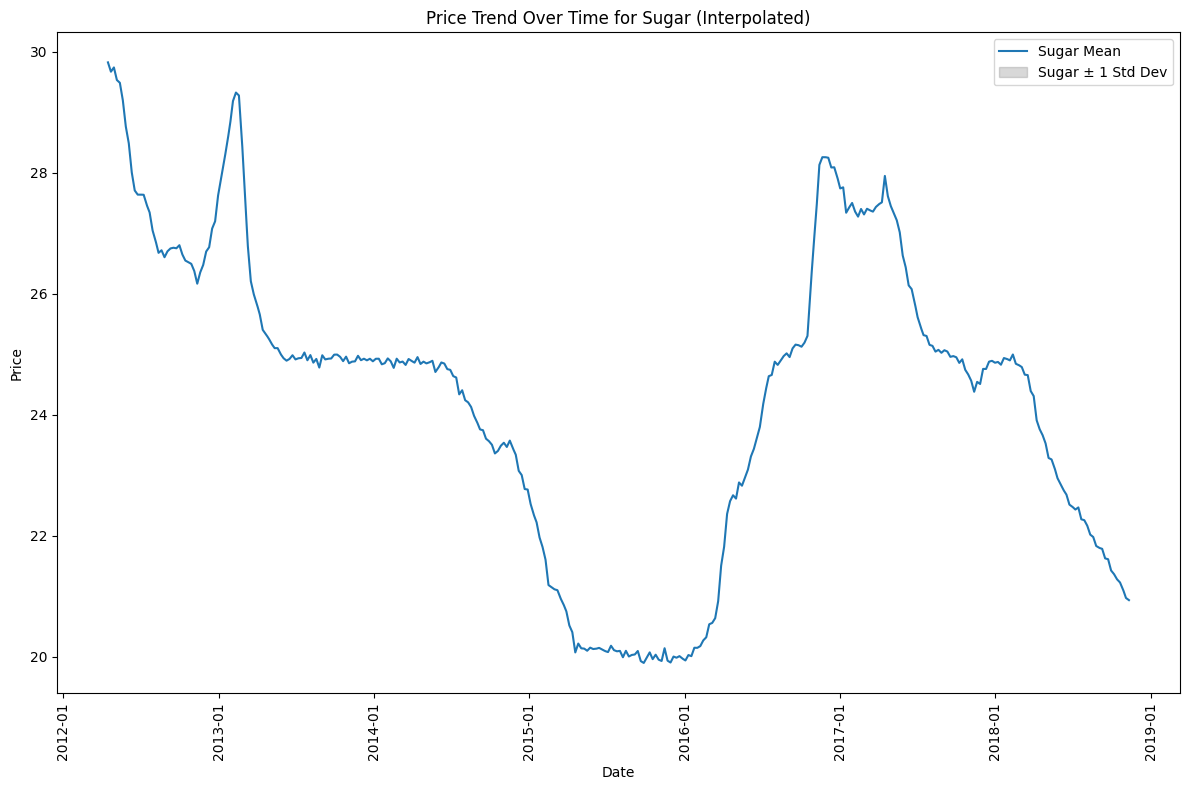

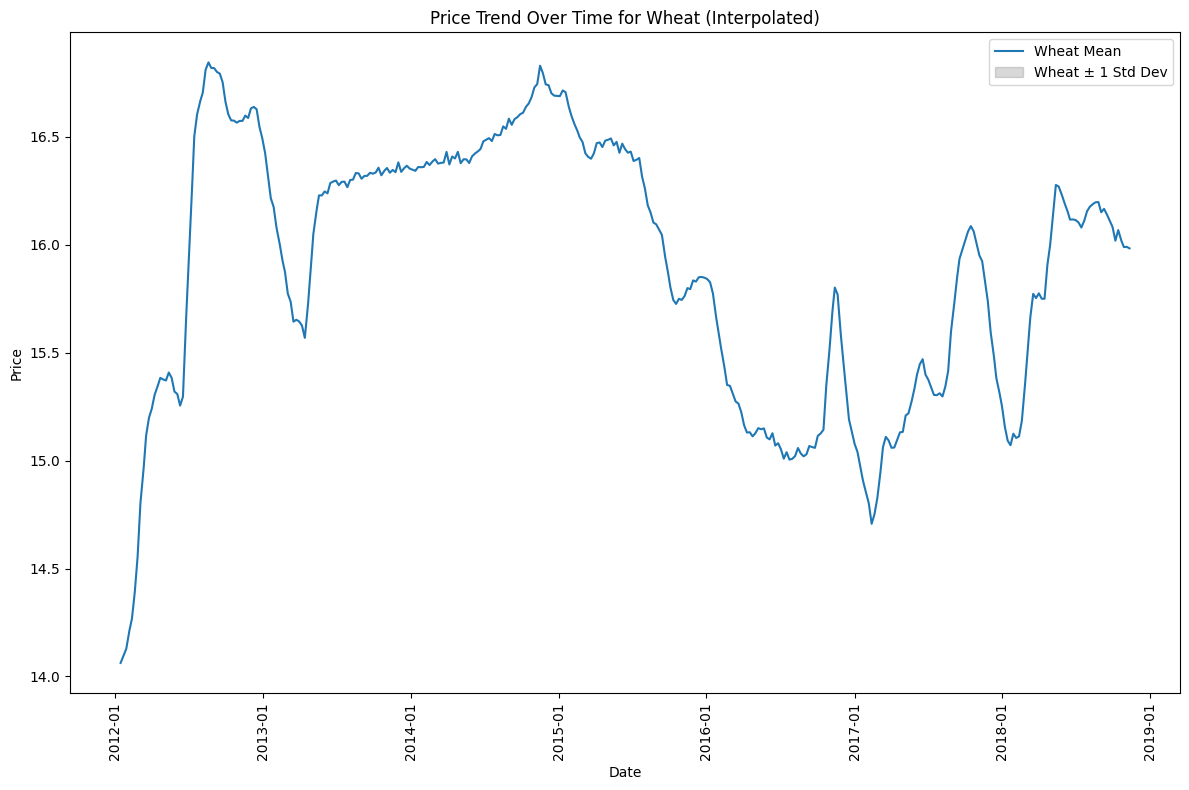

In [152]:
# Ensure that the 'date' column in df_interpolated is properly converted
df_interpolated['date'] = pd.to_datetime(df_interpolated['date'])

# Get the unique commodity and admin2_name values
key_commodities = df_interpolated['aggregated_commodity_name'].unique()
admin2_names = df_interpolated['admin2_name'].unique()

target_admin2 = admin2_names[1]
for commodity in key_commodities:
    subset = df_interpolated[
        (df_interpolated['aggregated_commodity_name'] == commodity) &
        (df_interpolated['admin2_name'] == target_admin2)
    ].sort_values('date')
    
    if subset.empty:
        continue  # Skip groups with no data
    
    # Group by date to compute mean and standard deviation of prices
    grouped_mean = subset.groupby('date')['price'].mean()
    grouped_std = subset.groupby('date')['price'].std()
    
    # Check if we have valid dates for interpolation
    start_date = grouped_mean.index.min()
    end_date = grouped_mean.index.max()
    
    if pd.isna(start_date) or pd.isna(end_date):
        print(f"Skipping {commodity} for {target_admin2} due to invalid date boundaries.")
        continue  # Skip this group if no valid date range
    
    # Create a complete daily date range using the valid start and end dates
    full_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Reindex the grouped data to the full date range and interpolate missing values
    mean_interp = grouped_mean.reindex(full_range).interpolate(method='time', limit_direction='both')
    std_interp = grouped_std.reindex(full_range).interpolate(method='time', limit_direction='both')
    
    # Plot the mean and the ±1 standard deviation shaded area
    plt.figure(figsize=(12, 8))
    plt.plot(mean_interp.index, mean_interp.values, label=f'{commodity} Mean')
    plt.fill_between(
        mean_interp.index,
        mean_interp.values - std_interp.values,
        mean_interp.values + std_interp.values,
        color='gray', alpha=0.3, label=f'{commodity} ± 1 Std Dev'
    )
    plt.title(f"Price Trend Over Time for {commodity} (Interpolated)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    
    # Format x-axis with proper date formatting
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [153]:
admin2_names

array(['Barkeol', 'Kankoussa', 'Kiffa'], dtype=object)

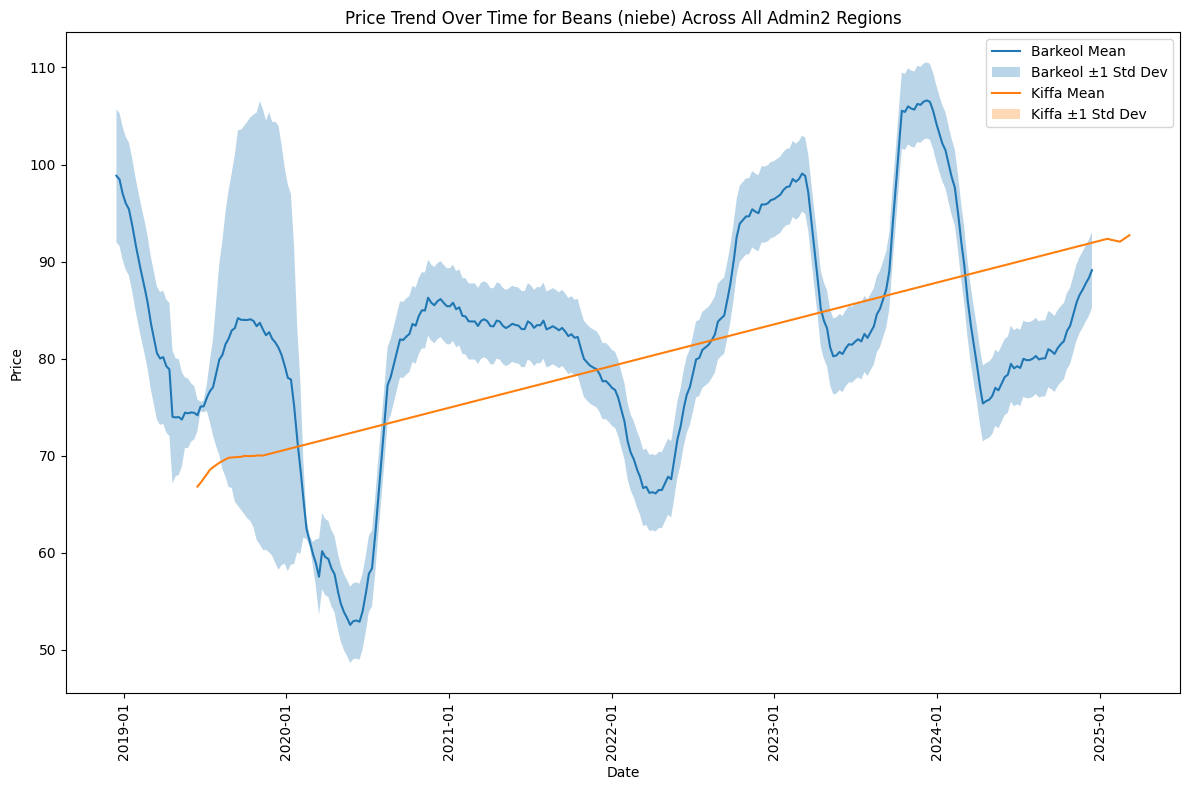

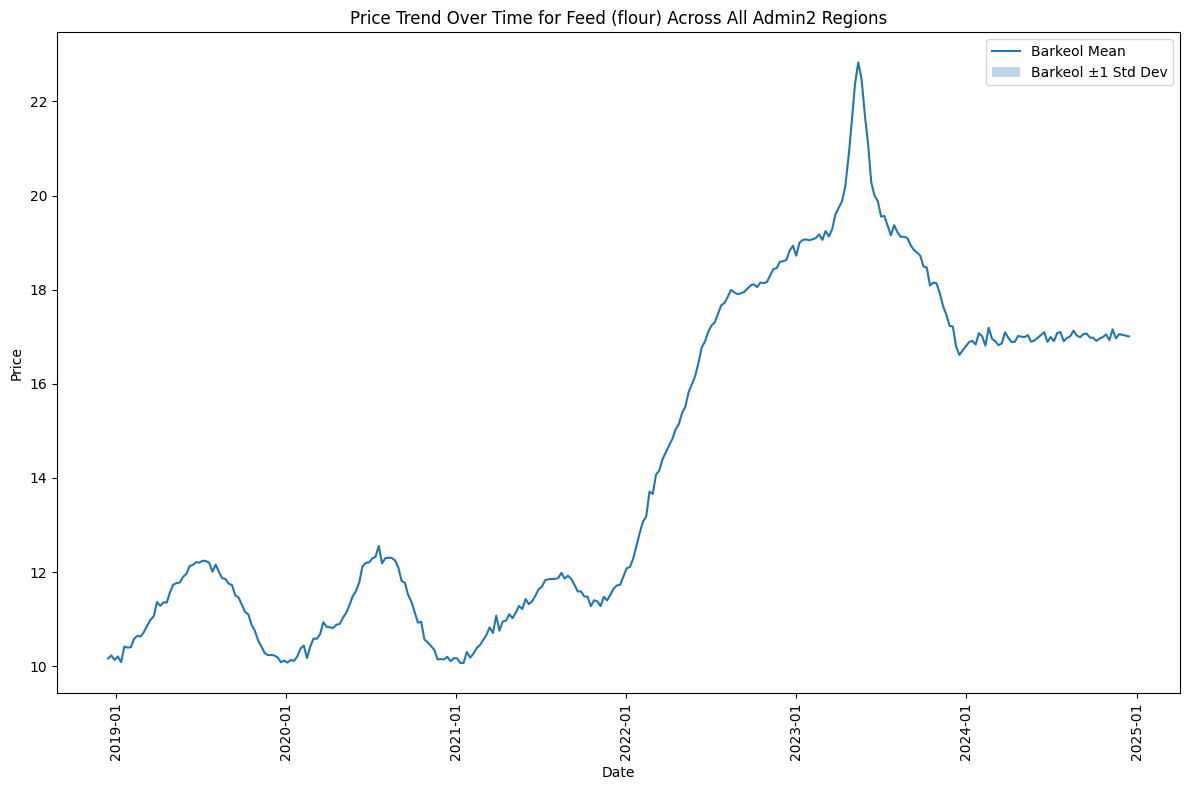

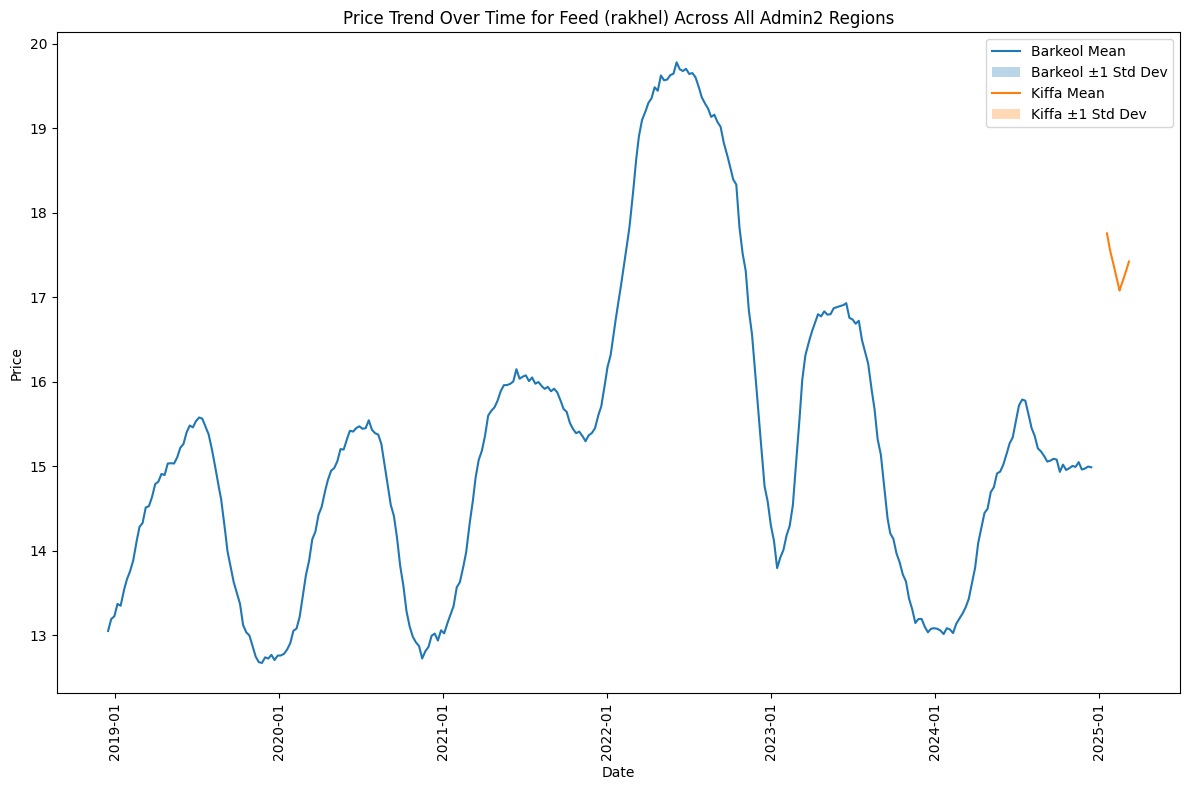

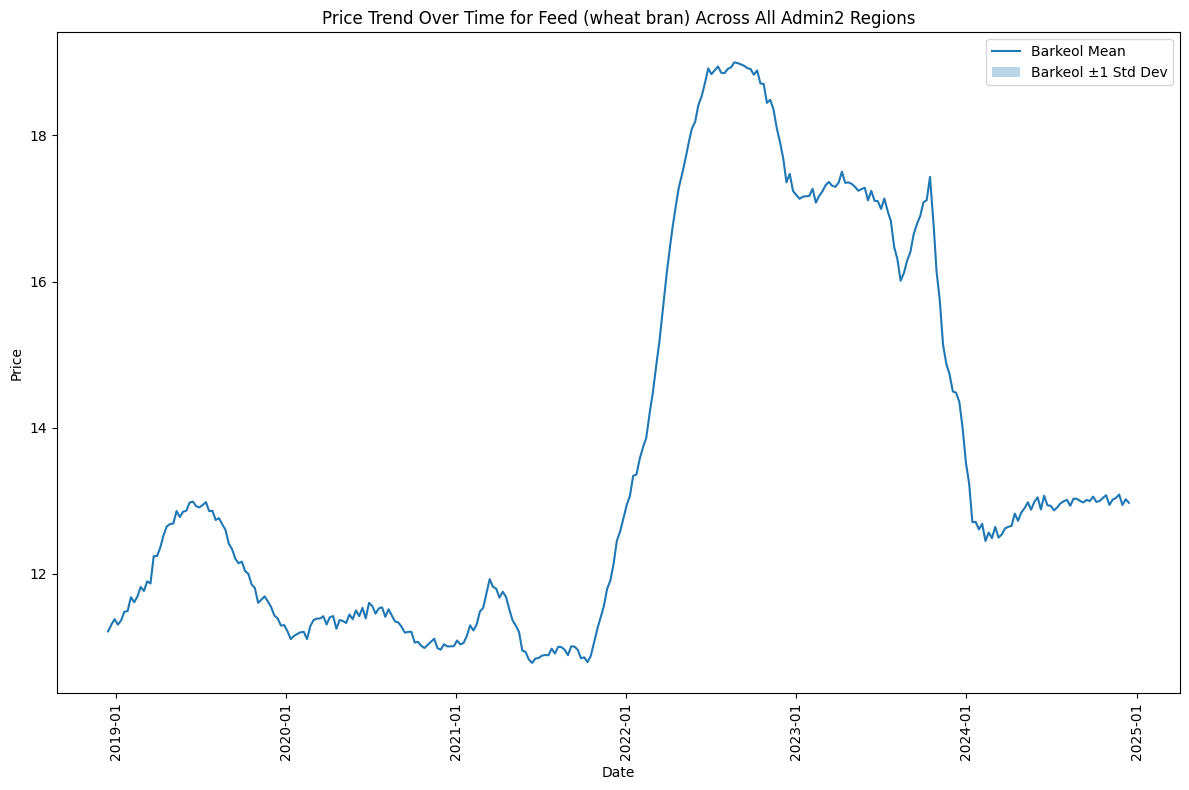

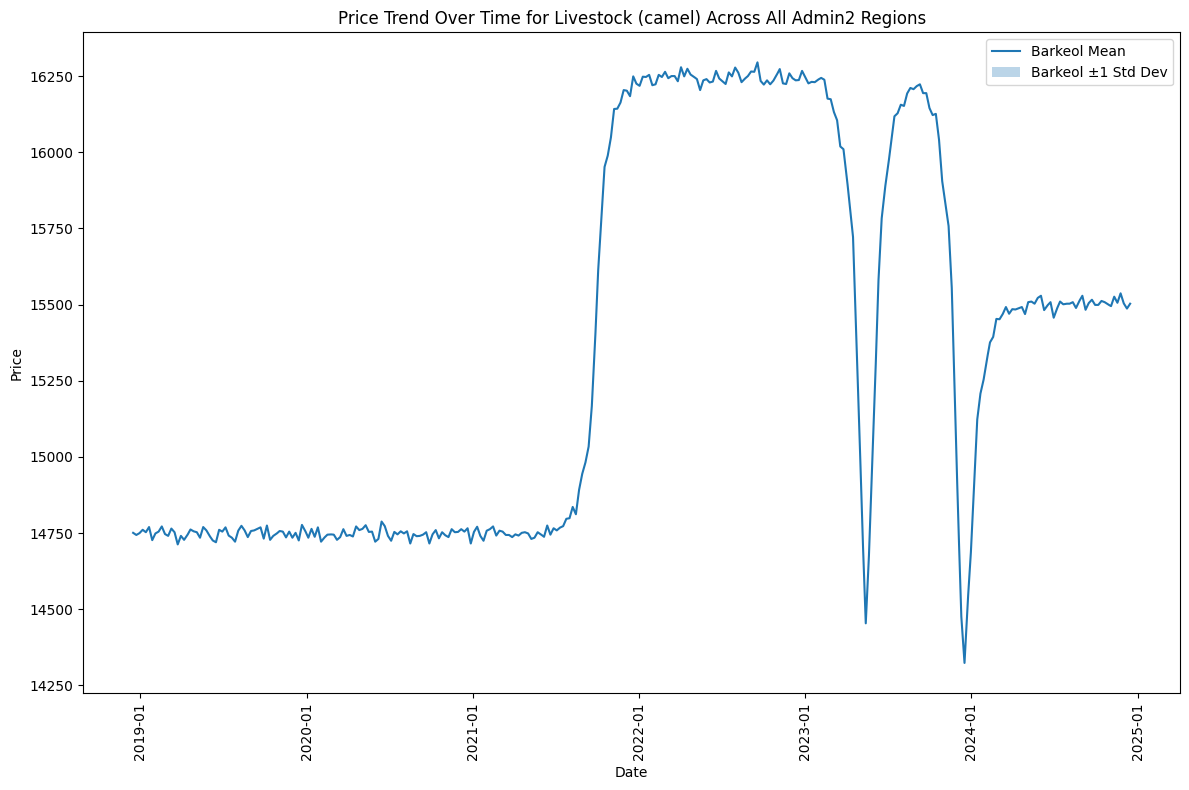

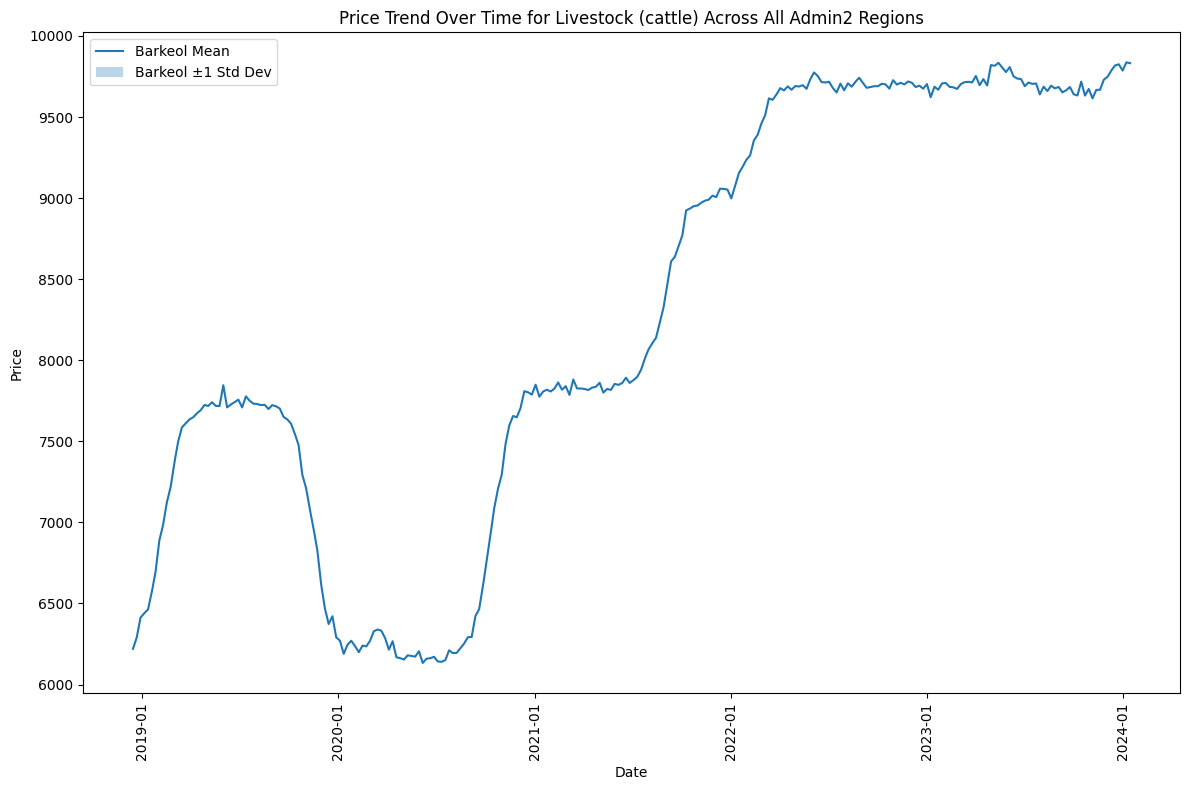

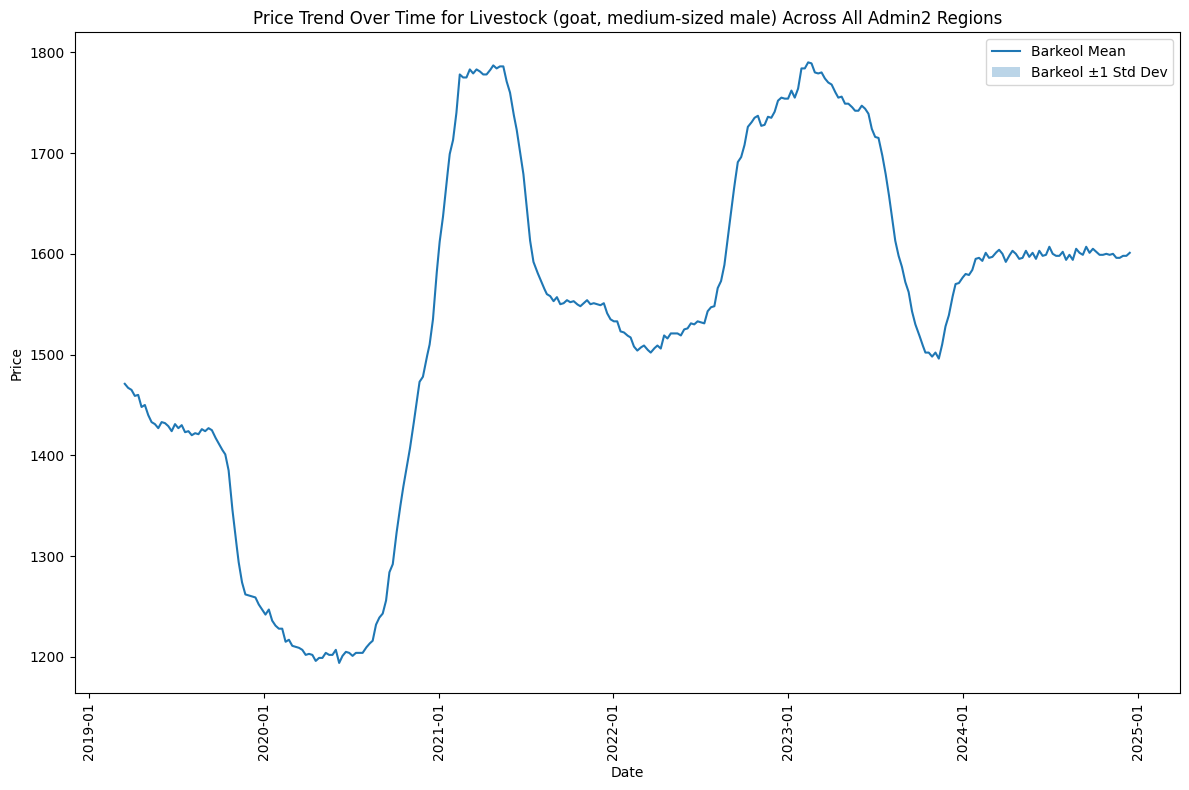

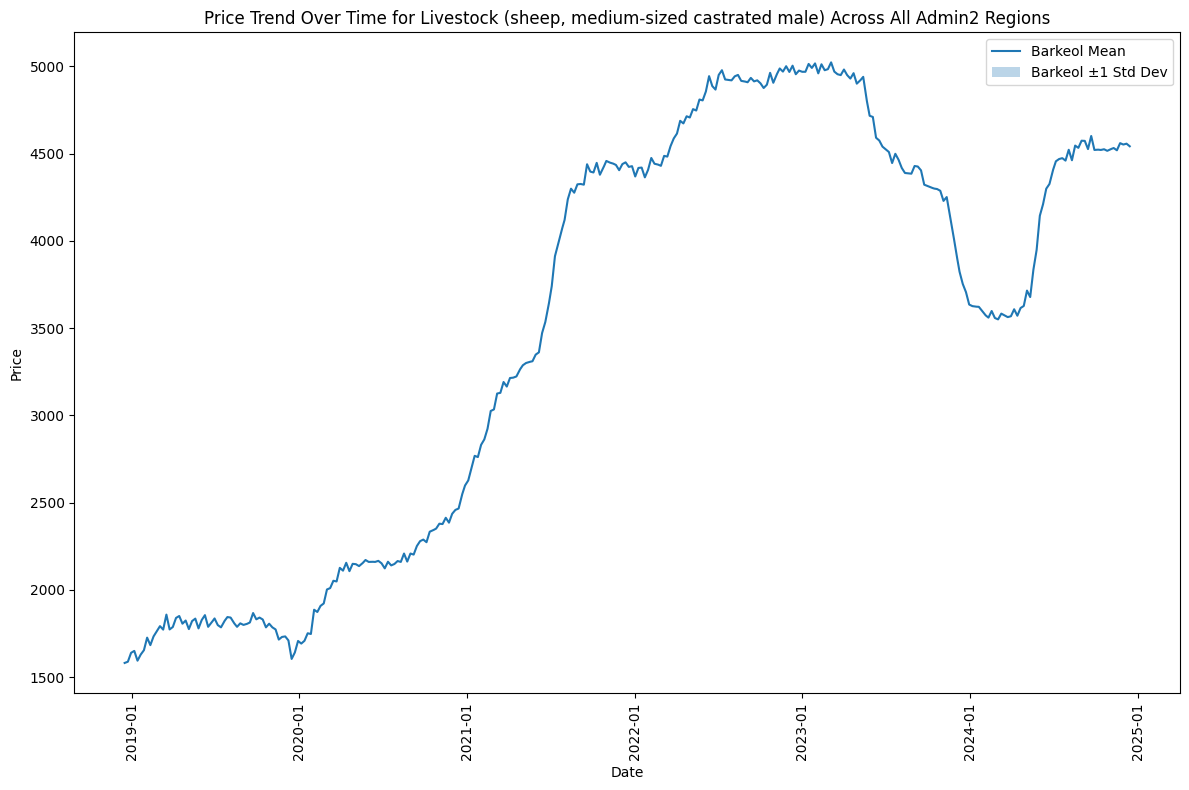

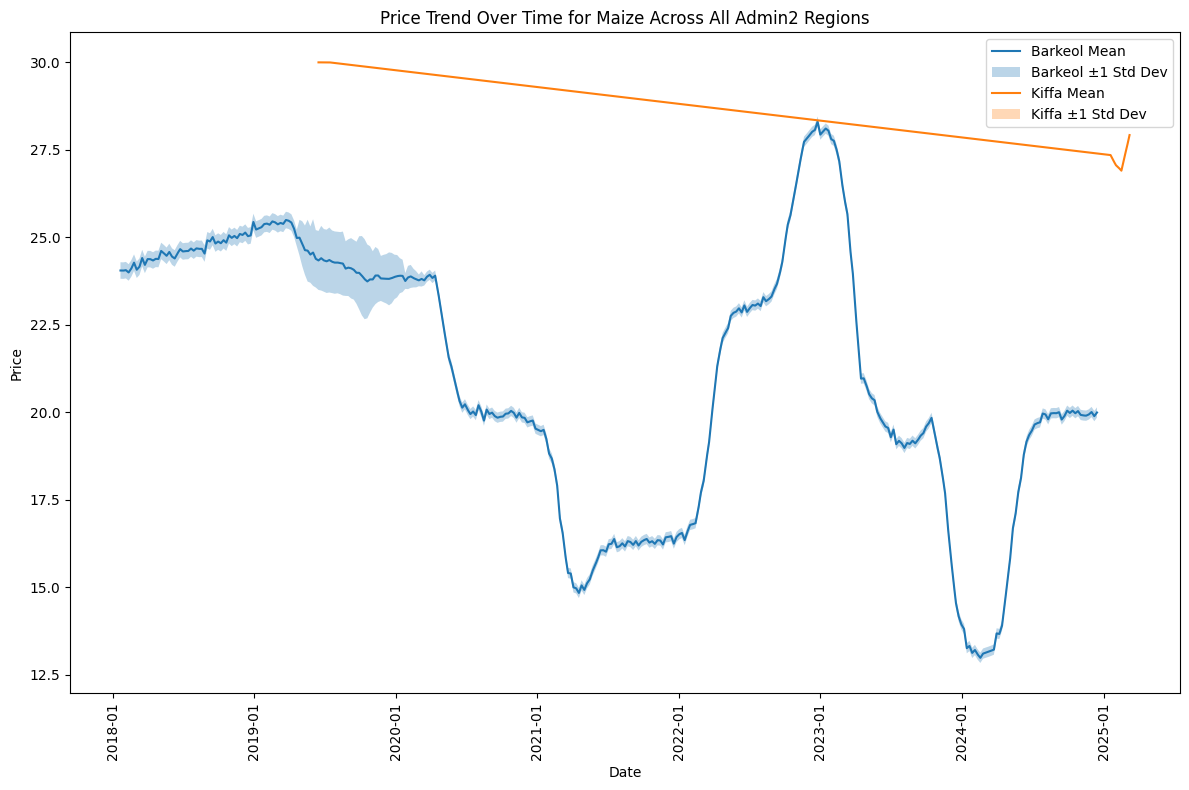

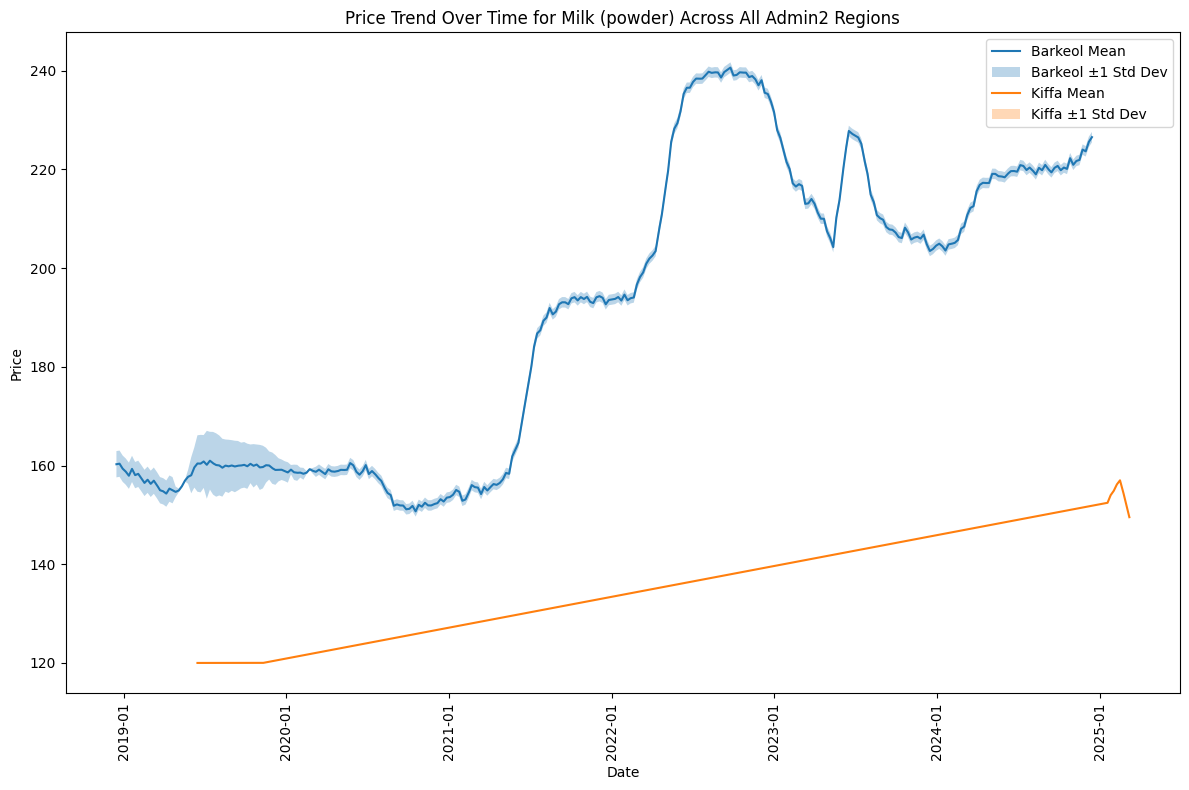

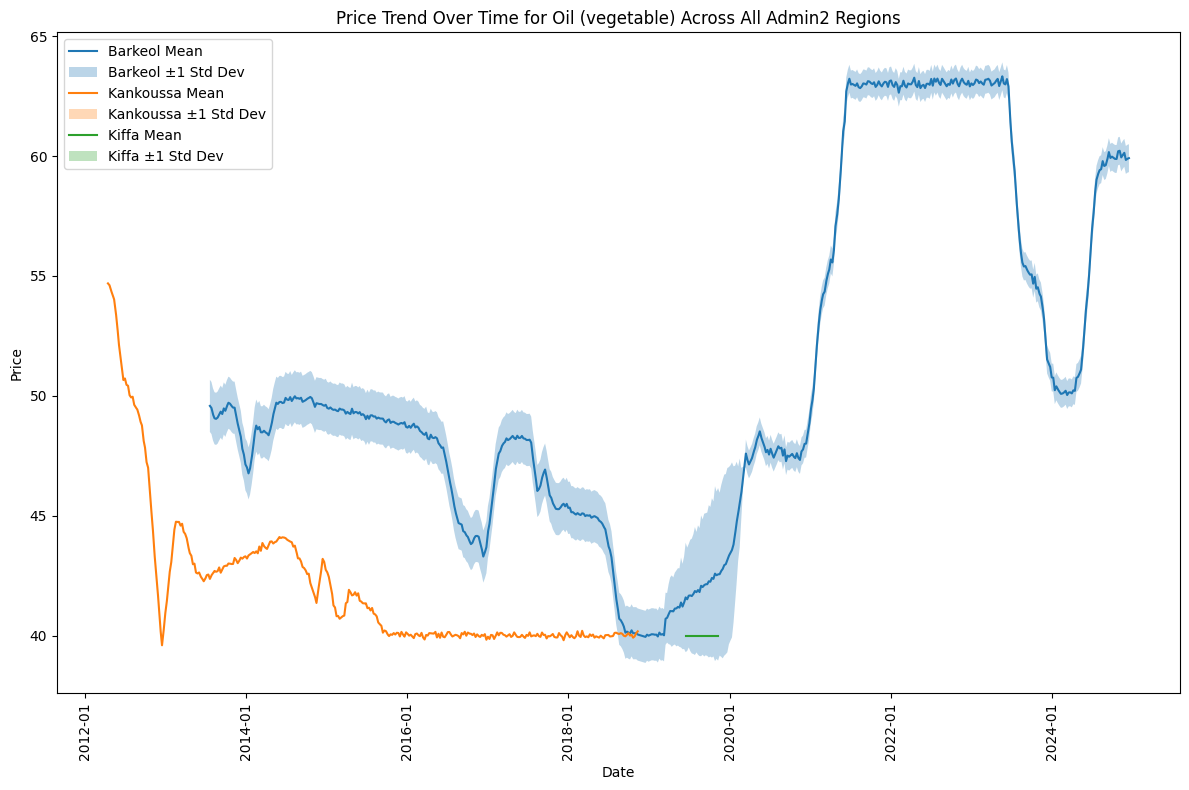

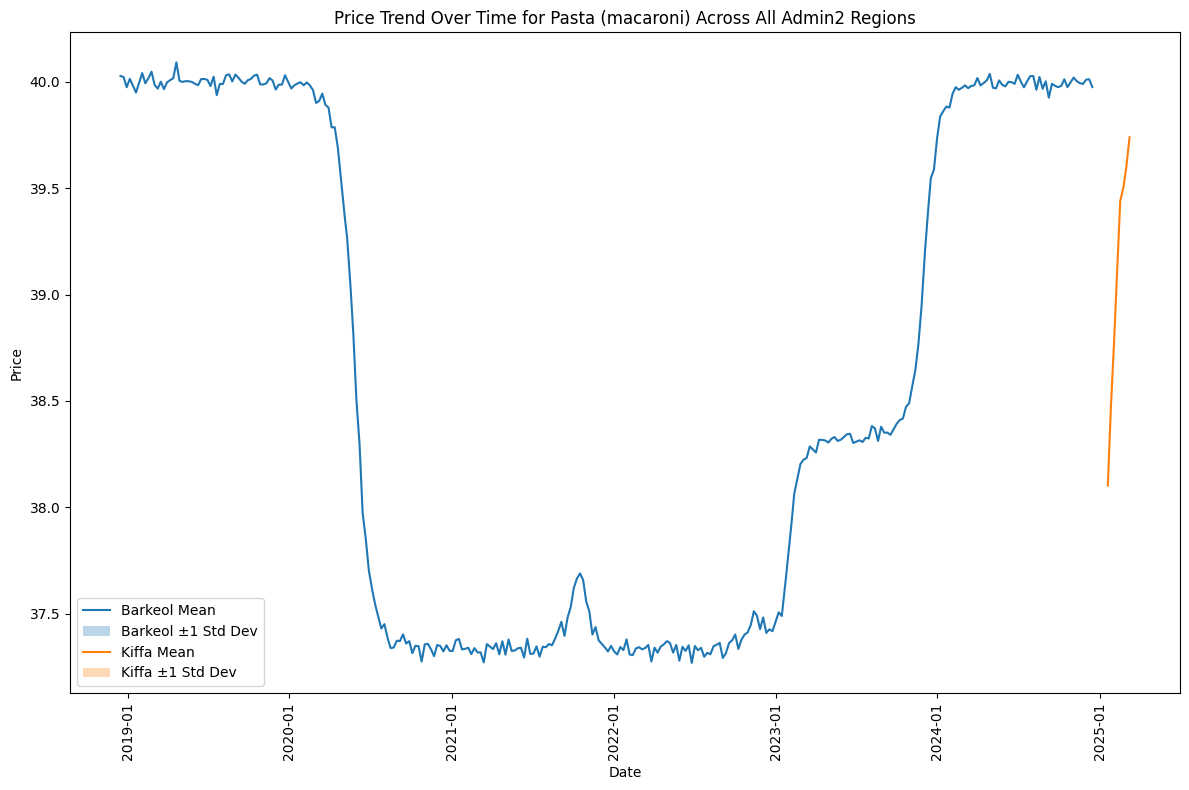

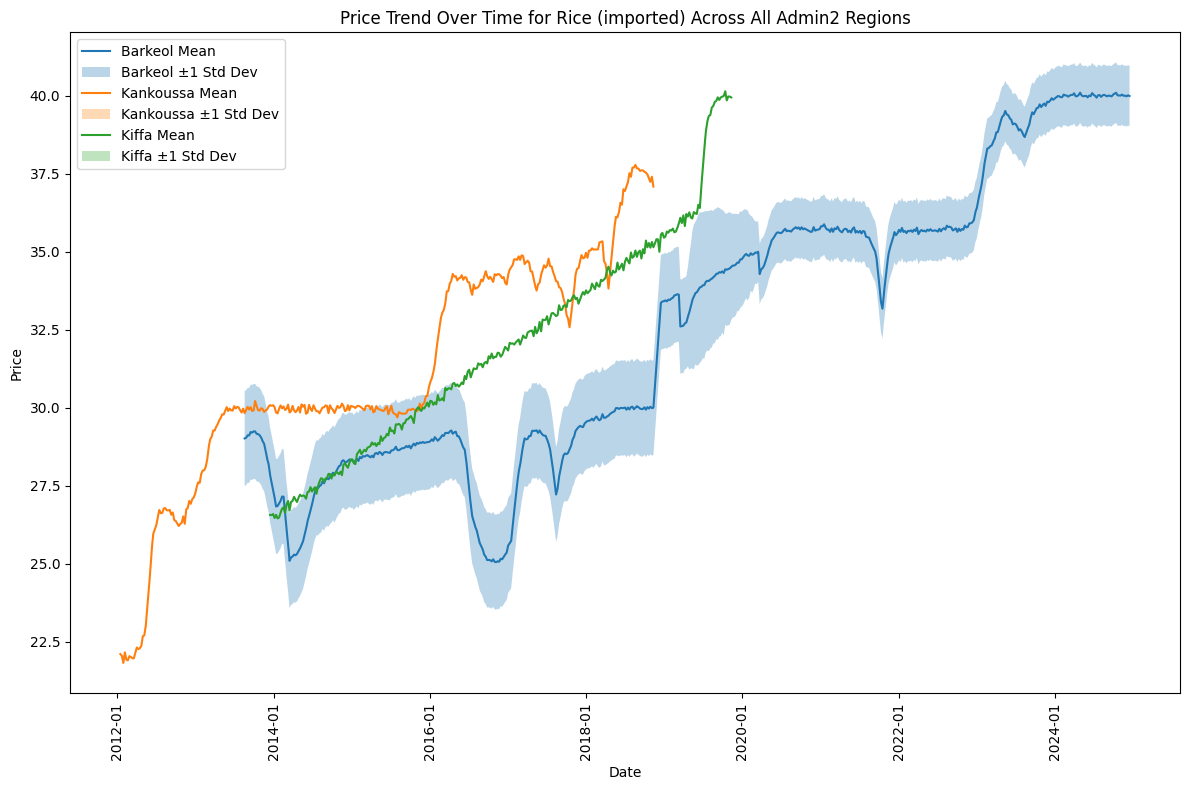

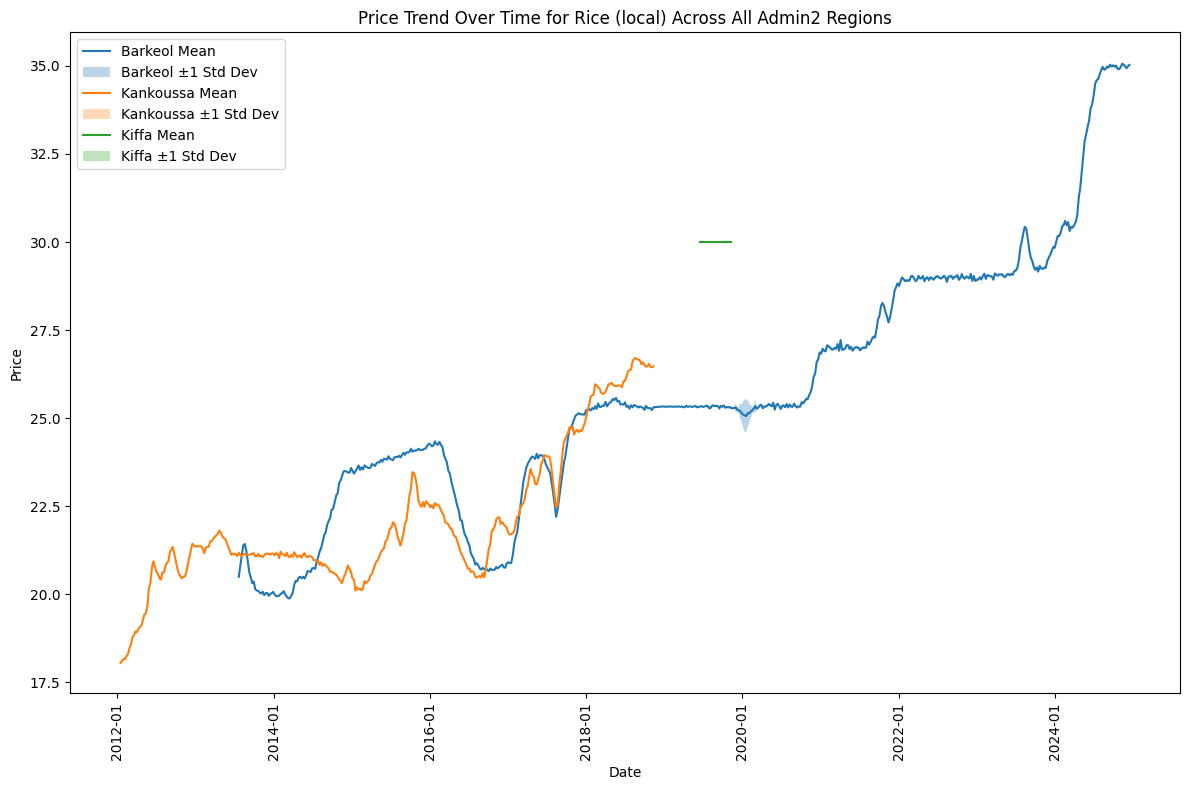

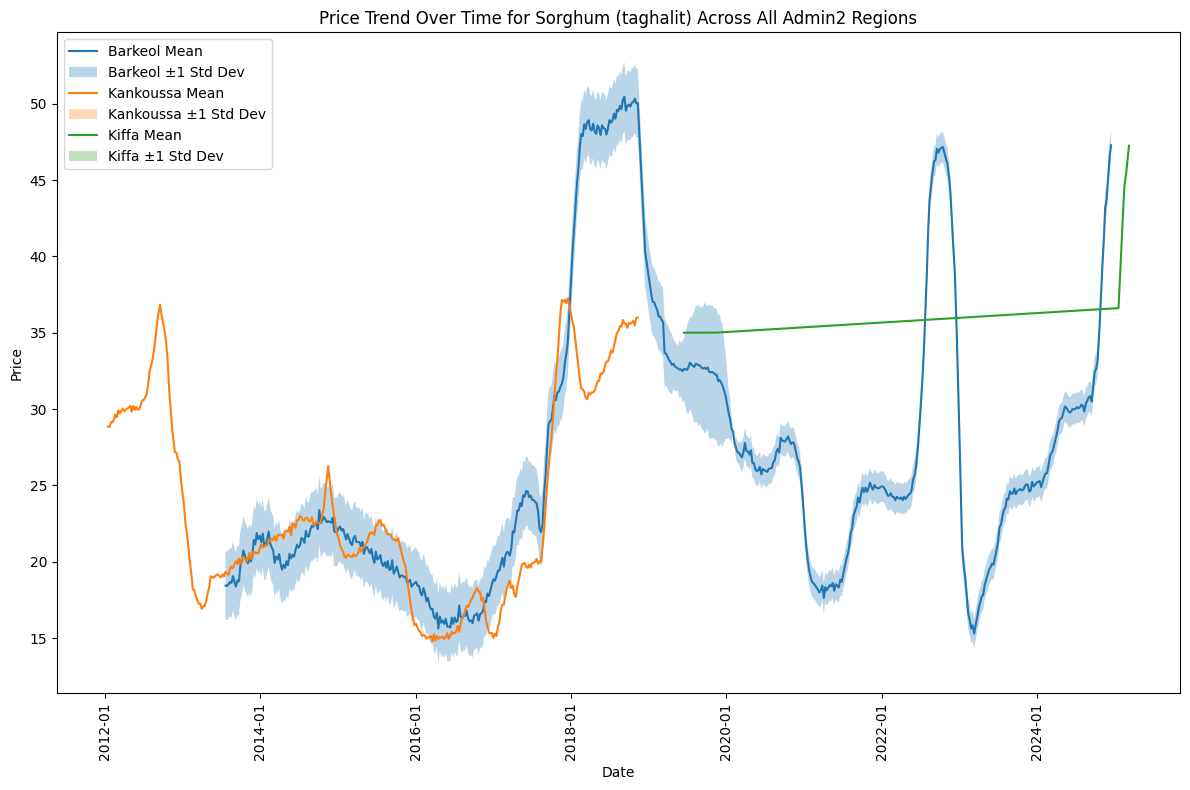

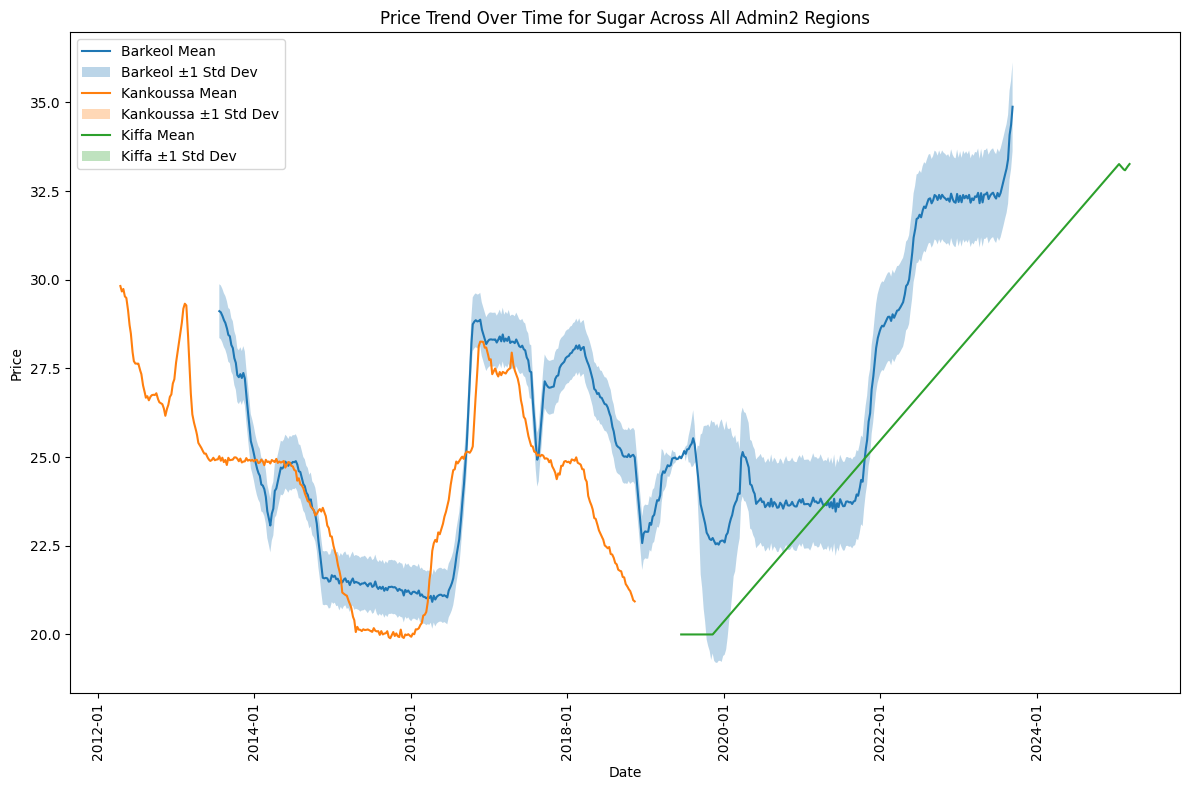

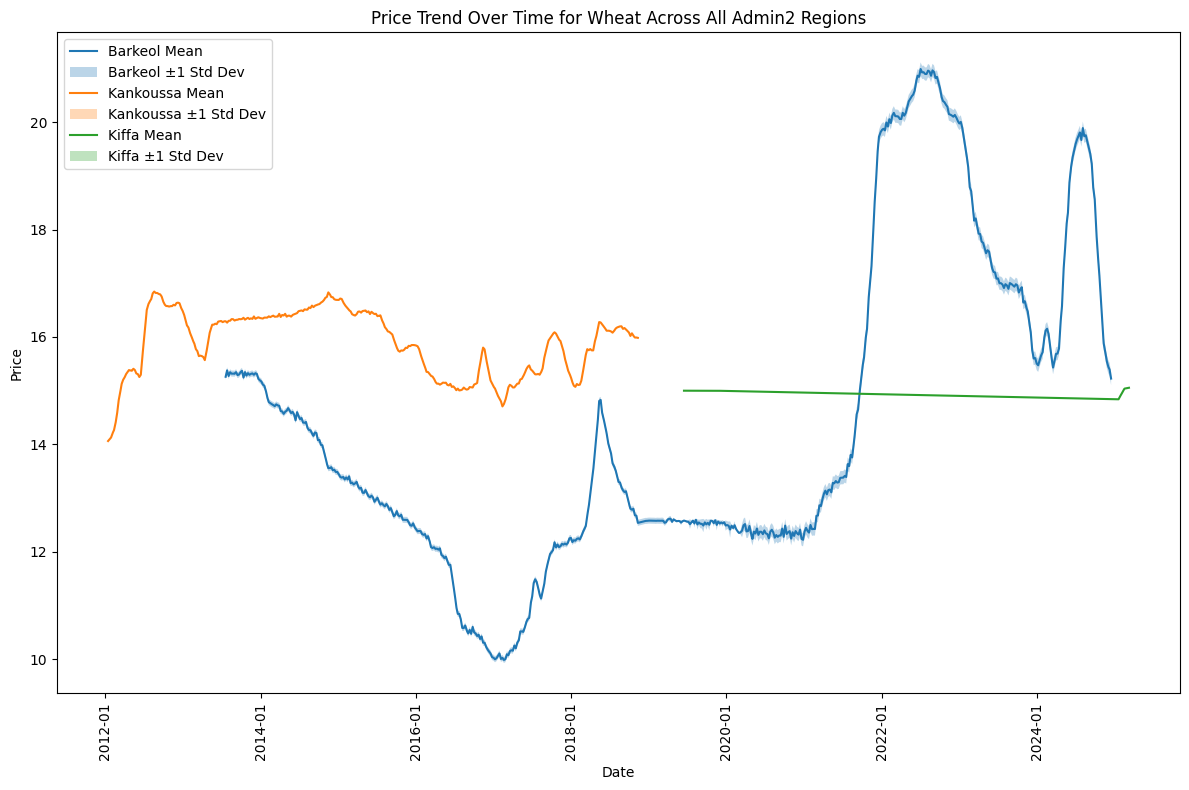

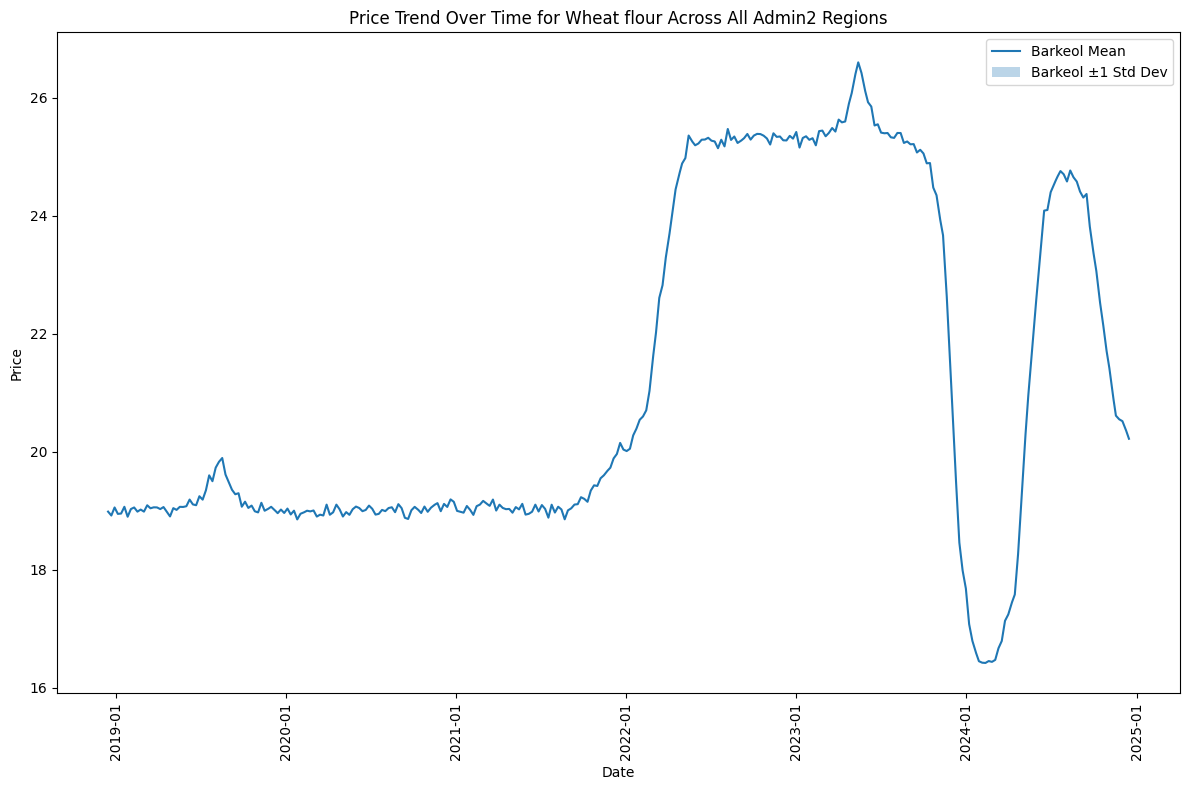

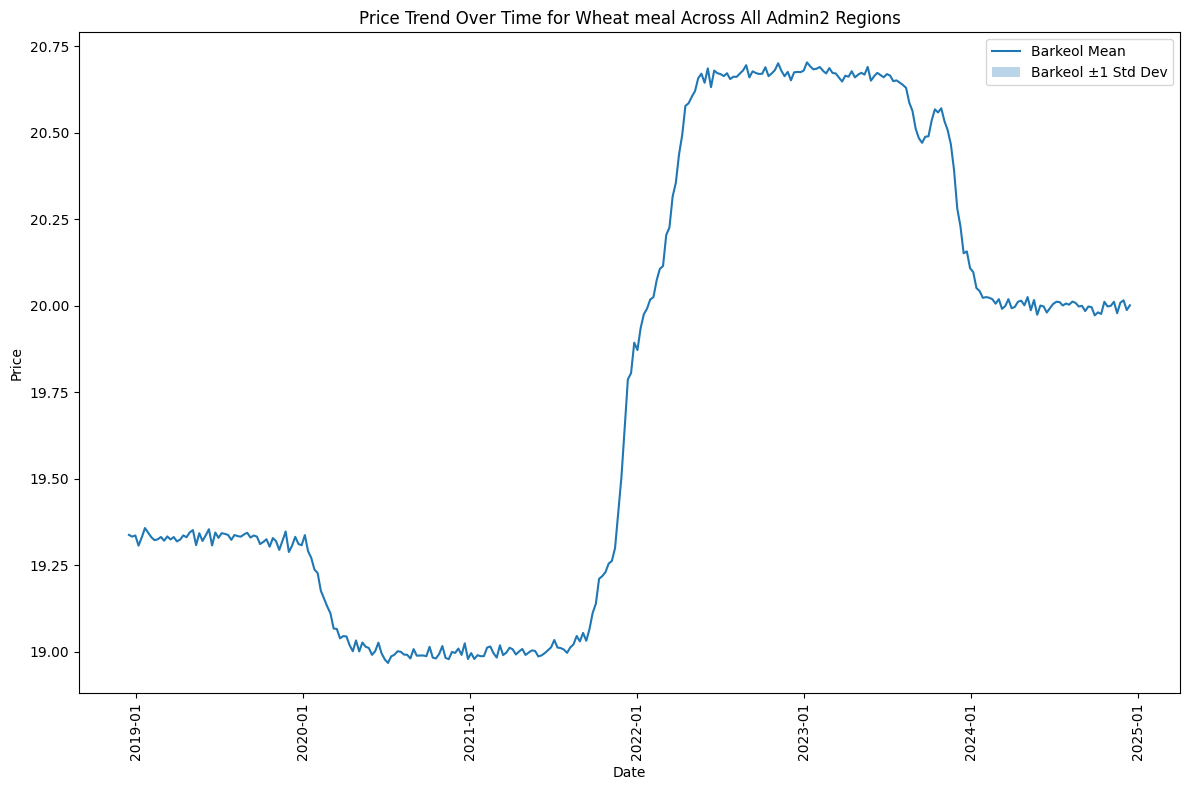

In [154]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

# Ensure that the 'date' column in df_interpolated is properly converted
df_interpolated['date'] = pd.to_datetime(df_interpolated['date'])

# Get the unique commodity and admin2_name values
key_commodities = df_interpolated['aggregated_commodity_name'].unique()
admin2_names = df_interpolated['admin2_name'].unique()

for commodity in key_commodities:
    plt.figure(figsize=(12, 8))
    
    # Filter data for the current commodity
    commodity_subset = df_interpolated[df_interpolated['aggregated_commodity_name'] == commodity]
    
    for admin in admin2_names:
        subset = commodity_subset[commodity_subset['admin2_name'] == admin].sort_values('date')
        
        if subset.empty:
            continue  # Skip if no data for this admin
        
        # Group by date to compute mean and standard deviation of prices
        grouped_mean = subset.groupby('date')['price'].mean()
        grouped_std = subset.groupby('date')['price'].std()
        
        # Determine valid date range for interpolation
        start_date = grouped_mean.index.min()
        end_date = grouped_mean.index.max()
        
        if pd.isna(start_date) or pd.isna(end_date):
            print(f"Skipping {commodity} for {admin} due to invalid date boundaries.")
            continue
        
        # Create a complete daily date range and interpolate missing values
        full_range = pd.date_range(start=start_date, end=end_date, freq='D')
        mean_interp = grouped_mean.reindex(full_range).interpolate(method='time', limit_direction='both')
        std_interp = grouped_std.reindex(full_range).interpolate(method='time', limit_direction='both')
        
        # Plot the mean and the ±1 standard deviation shaded area
        plt.plot(mean_interp.index, mean_interp.values, label=f'{admin} Mean')
        plt.fill_between(
            mean_interp.index,
            mean_interp.values - std_interp.values,
            mean_interp.values + std_interp.values,
            alpha=0.3, label=f'{admin} ±1 Std Dev'
        )
    
    plt.title(f"Price Trend Over Time for {commodity} Across All Admin2 Regions")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    
    # Format x-axis with proper date formatting
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [157]:
df_interpolated.to_csv("hdx_hapi_food_price_assaba_clean.csv")